In [634]:
import re
import pandas as pd
import numpy as np
import missingno as msno #(package for graphical analysis of missing values)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import locale
import warnings
warnings.filterwarnings('ignore') #Ignorer Les Avertissements

# Business understanding

L'ensemble de données "mobiles" est une collection complète d'informations sur divers téléphones mobiles. Il comprend des détails sur une gamme de fonctionnalités telles que les noms des téléphones, des liens vers leurs images, des notes, des critiques, des prix, de la mémoire, un appareil photo, un écran, une batterie, un processeur et des informations sur la garantie.

Cet ensemble de données peut être utile pour effectuer des analyses, comparer les spécifications et comprendre les tendances du marché de la téléphonie mobile. Les chercheurs et les analystes peuvent utiliser les données pour identifier des modèles et des idées, tandis que les consommateurs peuvent exploiter les informations pour prendre des décisions éclairées lors de la sélection d'un téléphone mobile qui répond à leurs besoins spécifiques.

Dans l'ensemble, l'ensemble de données "mobiles" est une ressource précieuse pour quiconque s'intéresse à l'industrie de la téléphonie mobile, des consommateurs aux analystes et chercheurs. Avec son ensemble complet d'informations sur divers modèles de téléphones mobiles, cet ensemble de données peut servir d'outil précieux pour un large éventail d'applications.

# Data understanding 

In [635]:
mobiles = pd.read_csv('mobiles.csv', index_col=0)
# remove images_link column 
mobiles.drop('images_links', inplace=True, axis=1)
mobiles.head()

,names,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"1,20,759 Ratings & 7,003 Reviews","₹9,699\n₹14,99935% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...
1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"1,20,759 Ratings & 7,003 Reviews","₹9,699\n₹14,99935% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...
2,itel it2163S,4.1,702 Ratings & 67 Reviews,₹989\n₹9991% off,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,"BT Caller, Kingtalker"
3,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.4,"1,20,759 Ratings & 7,003 Reviews","₹10,699\n₹16,99937% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.4,"1,20,759 Ratings & 7,003 Reviews","₹10,699\n₹16,99937% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...


In [636]:
mobiles.shape

(1148, 10)

In [637]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1147
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   names           943 non-null    object 
 1   stars           922 non-null    float64
 2   rating&reviews  922 non-null    object 
 3   price_details   1143 non-null   object 
 4   memory          943 non-null    object 
 5   camara_info     943 non-null    object 
 6   display         943 non-null    object 
 7   battery         943 non-null    object 
 8   processor       900 non-null    object 
 9   warranty        616 non-null    object 
dtypes: float64(1), object(9)
memory usage: 98.7+ KB


Comme l'on peut voir ci-dessus notre dataset contient 1148 lignes et 10 colonnes, toutes les colonnes sont de type "object" sauf stars qui est de type "float". 
Les données de certaines colonnes comme "rating&reviews", "price_details", "memory"... sont difficile à lire et analyser car elles contiennent des phrases ou de longues decsriptions, c'est pour cela qu'on doit faire quelques modifications pour que notre dataset devient plus lisible:

- Pour la colonne names, il est préférable de laisser juste le nom de l'appareil.
- La colonne rating&reviews va être séparer en 2 colonnes: une colonne pour les ratings et une autre pour reviews.
- De même price_details contient le prix avant solde, le prix après solde et le pourcentage du solde. Cette colonne va être répartie en 2: price_bd et price_ad.
- Pour la colonne memory on va juste sauvegarder la capacité de la RAM et la capacité du stockage du téléphone.
- A partir de la colonne camera_info on va créer 2 colonnes: front_cam et rear_cam qui reflétent la qualité des cameras du téléphone.
- A partir de display on va garder la taille et la résolution de l'écran dans 2 colonnes séparées.
- Concernant la colonne battery on va extraire juste la capacité de la batterie du téléphone.
- Processor va rester la même.
- A partir de la colonne warranty on va extraire le nombre d'années ou bien de mois ou bien de jours de la garantie. Puis on va les convertir toutes en jours.

Après ces modifications, notre dataset contiendra 1148 lignes et 15 colonnes.

In [638]:
# split the price_details column into two columns
mobiles[['price_ad', 'price_bd']] = mobiles['price_details'].apply(lambda x: pd.Series(str(x).split('\n₹')))

# remove 'off' from discount
for e in ['off', '₹', '%']:
    mobiles['price_ad'] = mobiles['price_ad'].str.replace(e, '')
    mobiles['price_bd'] = mobiles['price_bd'].str.replace(e, '')

In [639]:
#split the price column 
mobiles['price_bd']=mobiles['price_bd'].astype(str)
mobiles['price_bd']=mobiles['price_bd'].apply(lambda x: x[0:x.rfind(',')+4])
mobiles.sample(5)

,names,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,price_ad,price_bd
748,"realme GT Neo 3T (Dash Yellow, 128 GB)",4.3,"12,003 Ratings & 1,403 Reviews","₹24,999\n₹34,99928% off",6 GB RAM | 128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"24,999","34,999"
181,"OPPO Reno8T 5G (Midnight Black, 128 GB)",4.3,"1,154 Ratings & 135 Reviews","₹29,999\n₹38,99923% off",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,108MP + 2MP + 2MP | 32MP Front Camera,17.02 cm (6.7 inch) Full HD+ Display,4800 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 695 Processor,67W SUPERVOOC TM Charger I Dual Stereo Speakers,"29,999","38,999"
1145,NaN,NaN,NaN,"₹1,74916% off",NaN,NaN,NaN,NaN,NaN,NaN,"1,74916",nan
607,"realme 9i (Prism Black, 128 GB)",4.5,"26,375 Ratings & 1,565 Reviews","₹15,999\n₹17,99911% off",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP + 2MP | 16MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium ion Battery,Qualcomm Snapdragon 680 (SM6225) Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"15,999","17,999"
224,"realme C30 (Bamboo Green, 32 GB)",4.3,"81,191 Ratings & 4,361 Reviews","₹5,999\n₹8,49929% off",2 GB RAM | 32 GB ROM | Expandable Upto 1 TB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium Ion Battery,Unisoc T612 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"5,999","8,499"


In [640]:
# split the camera_info column into front and rear
mobiles[['rear_cam', 'front_cam']] = mobiles['camara_info'].apply(lambda x: pd.Series(str(x).split('|')))
mobiles['front_cam'] = mobiles['front_cam'].apply(lambda x: pd.Series(str(x).split('MP')[0]))
mobiles['rear_cam'] = mobiles['rear_cam'].apply(lambda x: pd.Series(str(x).split('MP')[0]))

In [641]:
# battery capacity column
mobiles['battery_capacity'] = mobiles['battery'].apply(lambda x: pd.Series(str(x).split('mAh')[0]))

In [642]:
mobiles[['battery','battery_capacity']].sample(10)

,battery,battery_capacity
229,5000 mAh Lithium Battery,5000
390,NaN,nan
347,5000 mAh Battery,5000
297,4410 mAh Battery,4410
212,5000 mAh Lithium polymer Battery,5000
721,5000 mAh Lithium-ion Polymer Battery,5000
735,2500 mAh Battery,2500
972,1900 mAh Battery,1900
479,1 Year Manufacturer warranty,1 Year Manufacturer warranty
167,NaN,nan


In [643]:
# warranty column
mobiles['warr'] = mobiles['warranty'].str.extract('(\d+)')
mobiles['warr'] = mobiles['warr'].astype(float)
mobiles['warr'] = mobiles['warr'].apply(lambda x: x*30 if ((x<30) and (x>3)) else x*365 if (x<3) else x)

In [644]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
mobiles2=pd.DataFrame()
mobiles2=mobiles.copy(deep=True)
mobiles2=mobiles2.iloc[:,[0,2,3,4,5,6,7]]
for i in range(len(mobiles)):
    try :
        mobiles2.iloc[i,0]=mobiles.names.str.split('(')[i][0]
    except :
        mobiles2.iloc[i,0]=mobiles.names[i]    
    try :
        mobiles2.iloc[i,1]=locale.atof(mobiles['rating&reviews'].str.split('Ratings')[i][0])
    except :
        mobiles2.iloc[i,1]=mobiles['rating&reviews'][i]
    try :
        mobiles2.iloc[i,2]=locale.atof(mobiles['rating&reviews'].str.split('&')[i][1].rstrip('Reviews'))
    except :
        mobiles2.iloc[i,2]=mobiles['rating&reviews'][i]
    try :
        mobiles2.iloc[i,4]=(mobiles['memory'].str.split('Upto')[i][1])
    except :
        mobiles2.iloc[i,4]=np.nan
    try :
        mobiles2.iloc[i,5]=(mobiles['display'].str.split('cm')[i][0])
    except :
        mobiles2.iloc[i,5]=np.nan
    try :
        mobiles2.iloc[i,6]=(mobiles['display'].str.split(')')[i][1])
    except :
        mobiles2.iloc[i,6]=np.nan
    try :
        ouf=mobiles['memory'].str.split('RAM')[i]
        if (len(ouf)>1):
            mobiles2.iloc[i,3]=(ouf[0])
        else :
            mobiles2.iloc[i,3]=np.nan
    except :
        mobiles2.iloc[i,3]=mobiles['memory'][i]

mobiles.names=mobiles2.iloc[:,0]
mobiles['ratings']=mobiles2.iloc[:,1]
mobiles['ratings']=mobiles['ratings'].astype(float)
mobiles['reviews']=mobiles2.iloc[:,2]
mobiles['reviews']=mobiles['reviews']
mobiles['RAM']=mobiles2.iloc[:,3]
mobiles['storage']=mobiles2.iloc[:,4]
mobiles['displaysize']=mobiles2.iloc[:,5]
mobiles['displaytechnology']=mobiles2.iloc[:,6]

In [645]:
# delete all the unecessary columns
mobiles = mobiles.drop(['rating&reviews', 'price_details', 'memory', 'camara_info', 'display', 'battery', 'warranty'], axis = 1)
mobiles.head()

,names,stars,processor,price_ad,price_bd,rear_cam,front_cam,battery_capacity,warr,ratings,reviews,RAM,storage,displaysize,displaytechnology
0,SAMSUNG Galaxy F13,4.4,Exynos 850 Processor,"9,699","14,999",50,8,6000,365.0,120759.0,7003.0,4 GB,1 TB,16.76,Full HD+ Display
1,SAMSUNG Galaxy F13,4.4,Exynos 850 Processor,"9,699","14,999",50,8,6000,365.0,120759.0,7003.0,4 GB,1 TB,16.76,Full HD+ Display
2,itel it2163S,4.1,9 Indian Input Language Support,989,999,1200 mAh Lithium Ion Battery,nan,7 Days Battery Backup with 1200,NaN,702.0,67.0,4 MB,32 GB,4.57,Quarter QVGA Display
3,SAMSUNG Galaxy F13,4.4,Exynos 850 Processor,"10,699","16,999",50,8,6000,365.0,120759.0,7003.0,4 GB,1 TB,16.76,Full HD+ Display
4,SAMSUNG Galaxy F13,4.4,Exynos 850 Processor,"10,699","16,999",50,8,6000,365.0,120759.0,7003.0,4 GB,1 TB,16.76,Full HD+ Display


In [646]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1147
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   names              943 non-null    object 
 1   stars              922 non-null    float64
 2   processor          900 non-null    object 
 3   price_ad           1148 non-null   object 
 4   price_bd           1148 non-null   object 
 5   rear_cam           1148 non-null   object 
 6   front_cam          1148 non-null   object 
 7   battery_capacity   1148 non-null   object 
 8   warr               562 non-null    float64
 9   ratings            922 non-null    float64
 10  reviews            922 non-null    object 
 11  RAM                885 non-null    object 
 12  storage            584 non-null    object 
 13  displaysize        943 non-null    object 
 14  displaytechnology  942 non-null    object 
dtypes: float64(3), object(12)
memory usage: 175.8+ KB


Après avoir effectué les modifications nécessaires sur les colonnes, on peut constater que notre dataset est devenue plus simple et lisible.

On a 15 colonnes dont 12 sont de type "object" et 3 de type "float".

Maintenant on doit passer à la phase du preprocessing où on va nettoyer les données, supprimer les données manquantes, les outliers ... 

Mais avant ça, on doit tout d'abord les détécter à travers des visualisations, des statistiques...

# Data Quality Identification

La phase d'identification de Data Quality Identification est l'une des étapes essentielles dans le processus de nettoyage des données.
Elle consiste à évaluer la qualité des données en identifiant les problèmes potentiels tels que les erreurs, les incohérences, les doublons, les données manquantes, les données incorrectes ou obsolètes, les valeurs aberrantes, etc.

### Analyse des valeurs manquantes

On constate que uniquement 5 colonnes de notre dataset qui sont complètes et n'ont aucune valeur manquante. 

Toutes les autres colonnes (10) ont un nombre de données manquantes qui est supérieur à 200.

Les colonnes warr (garantie) et storage (le stockage du téléphone) ont le plus grand nombre de valeurs manquantes ( supérieur à 500).

In [647]:
mobiles.isnull().sum()

names                205
stars                226
processor            248
price_ad               0
price_bd               0
rear_cam               0
front_cam              0
battery_capacity       0
warr                 586
ratings              226
reviews              226
RAM                  263
storage              564
displaysize          205
displaytechnology    206
dtype: int64

#### Nullity bar:

Sur le côté gauche du graphique, l'échelle de l'axe des ordonnées va de 0,0 à 1,0, où 1,0 représente l'exhaustivité des données à 100 %. Si la barre est inférieure à cela, cela indique que nous avons des valeurs manquantes dans cette colonne.

Sur le côté droit du graphique, l'échelle est mesurée en valeurs d'indice. Avec le coin supérieur droit représentant le nombre maximum de lignes dans le dataframe.

En haut du graphique, il y a une série de nombres qui représentent le nombre total de valeurs non nulles dans cette colonne.

<Axes: >

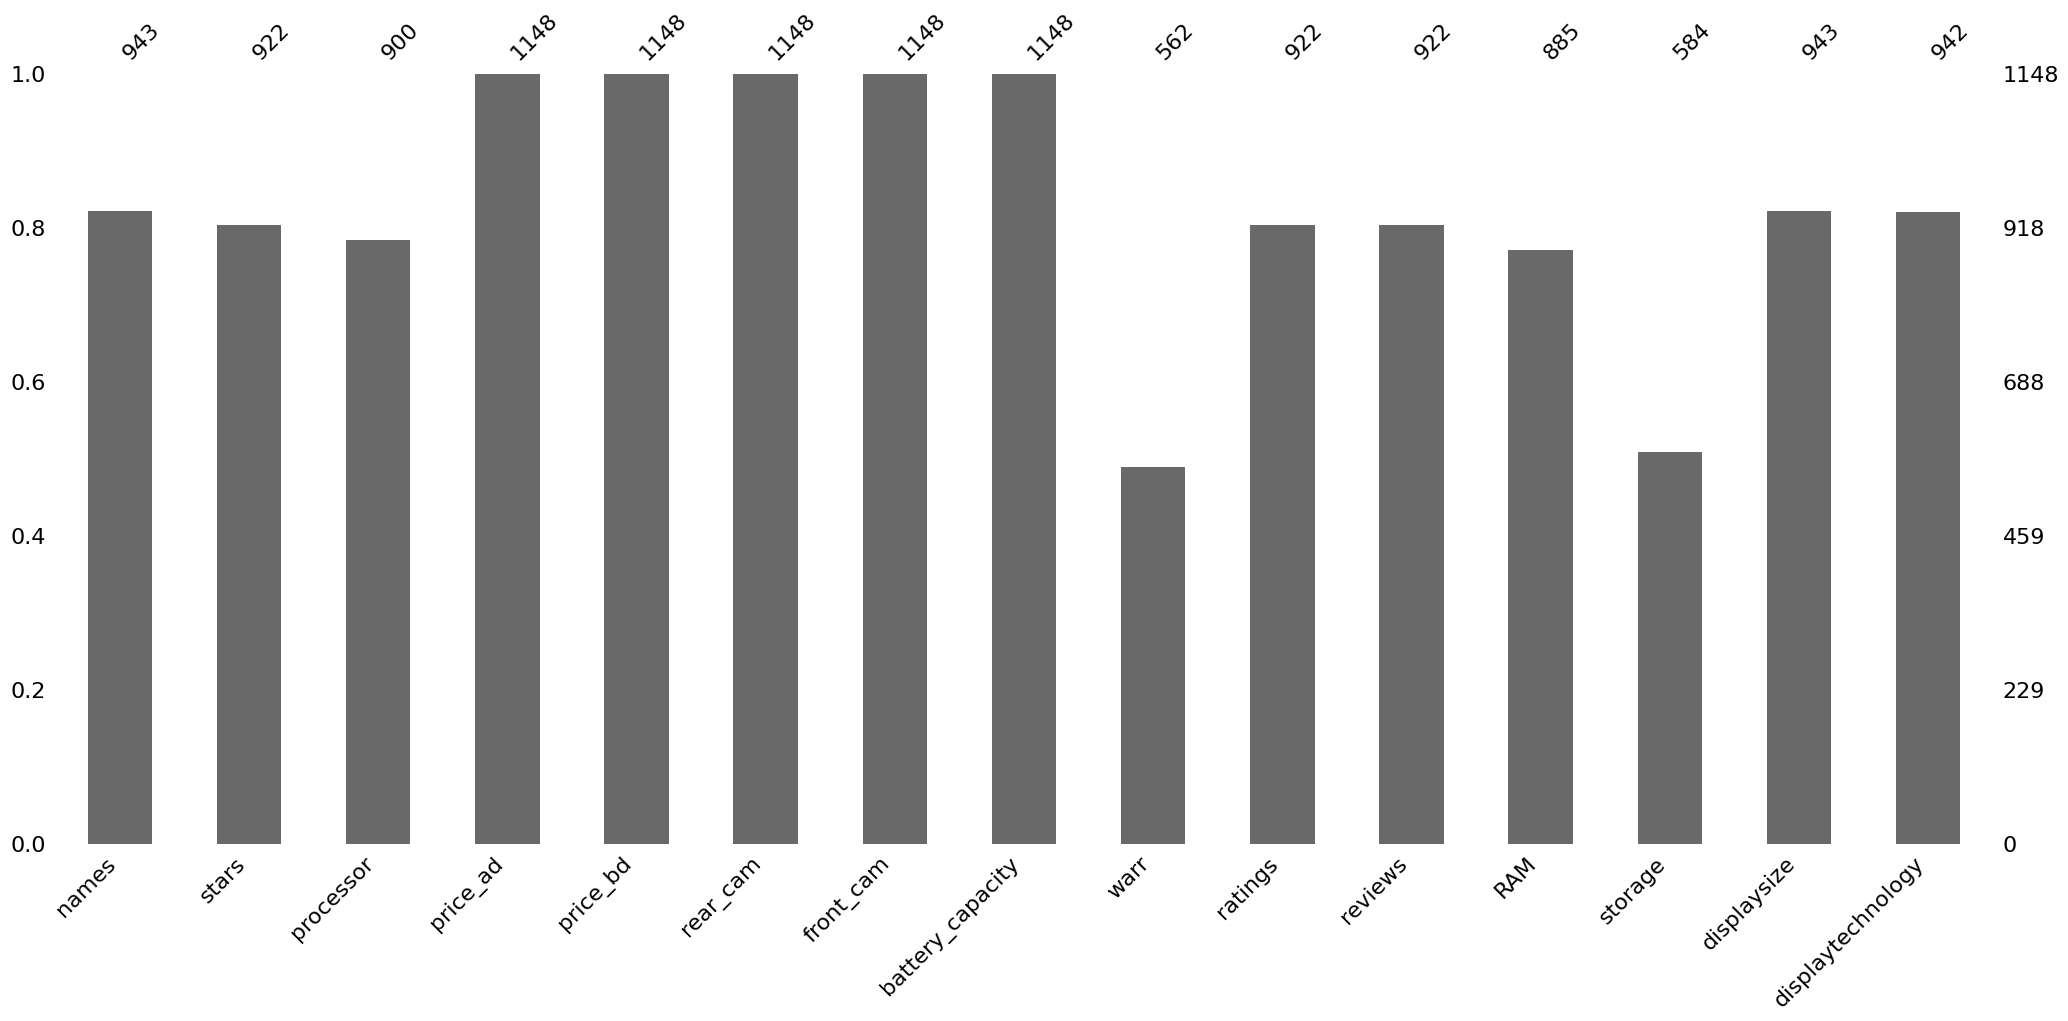

In [648]:
#Nullity Bar of the dataset 
msno.bar(mobiles)

#### Nullity matrix:

Sur le côté droit du tracé se trouve une ligne sparkline allant de 0 à gauche au nombre total de colonnes dans le dataframe à droite. Lorsqu'une ligne a une valeur dans chaque colonne, la ligne sera à la position maximale à droite. Au fur et à mesure que les valeurs manquantes commencent à augmenter dans cette ligne, la ligne se déplace vers la gauche.

<Axes: >

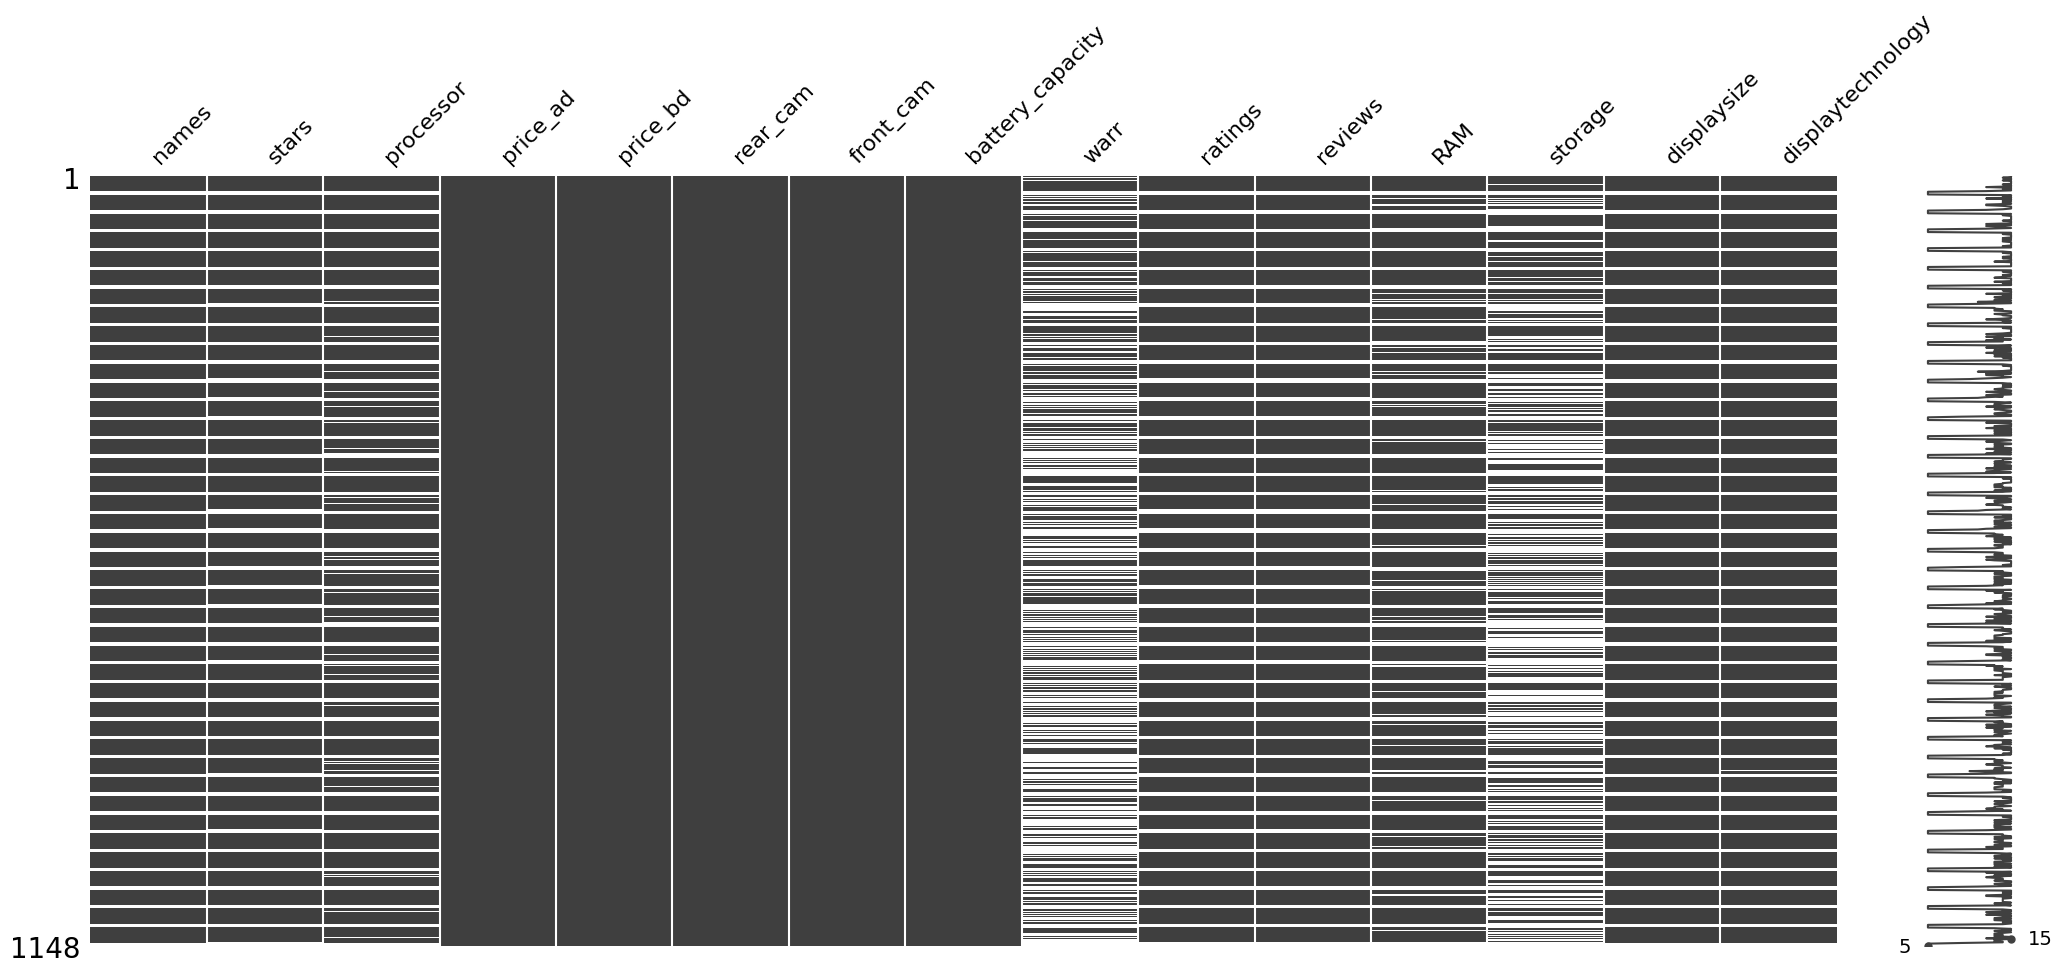

In [649]:
#Nullity Matrix of the dataset: the plot describes the nullity in the dataset using the white blanks
msno.matrix(mobiles)

#### Heatmap:

La heatmap est utilisée pour identifier les corrélations de la nullité entre chacune des différentes colonnes. En d'autres termes, il peut être utilisé pour identifier s'il existe une relation en présence de valeurs nulles entre chacune des colonnes.

Les cases avec une forte corrélation de valeurs manquantes sont représentées en bleu foncé ( exemple displaytechnology et processor ), tandis que les cases avec une corrélation plus faible sont représentées en bleu clair (exemple displaytechnology et storage).


<Axes: >

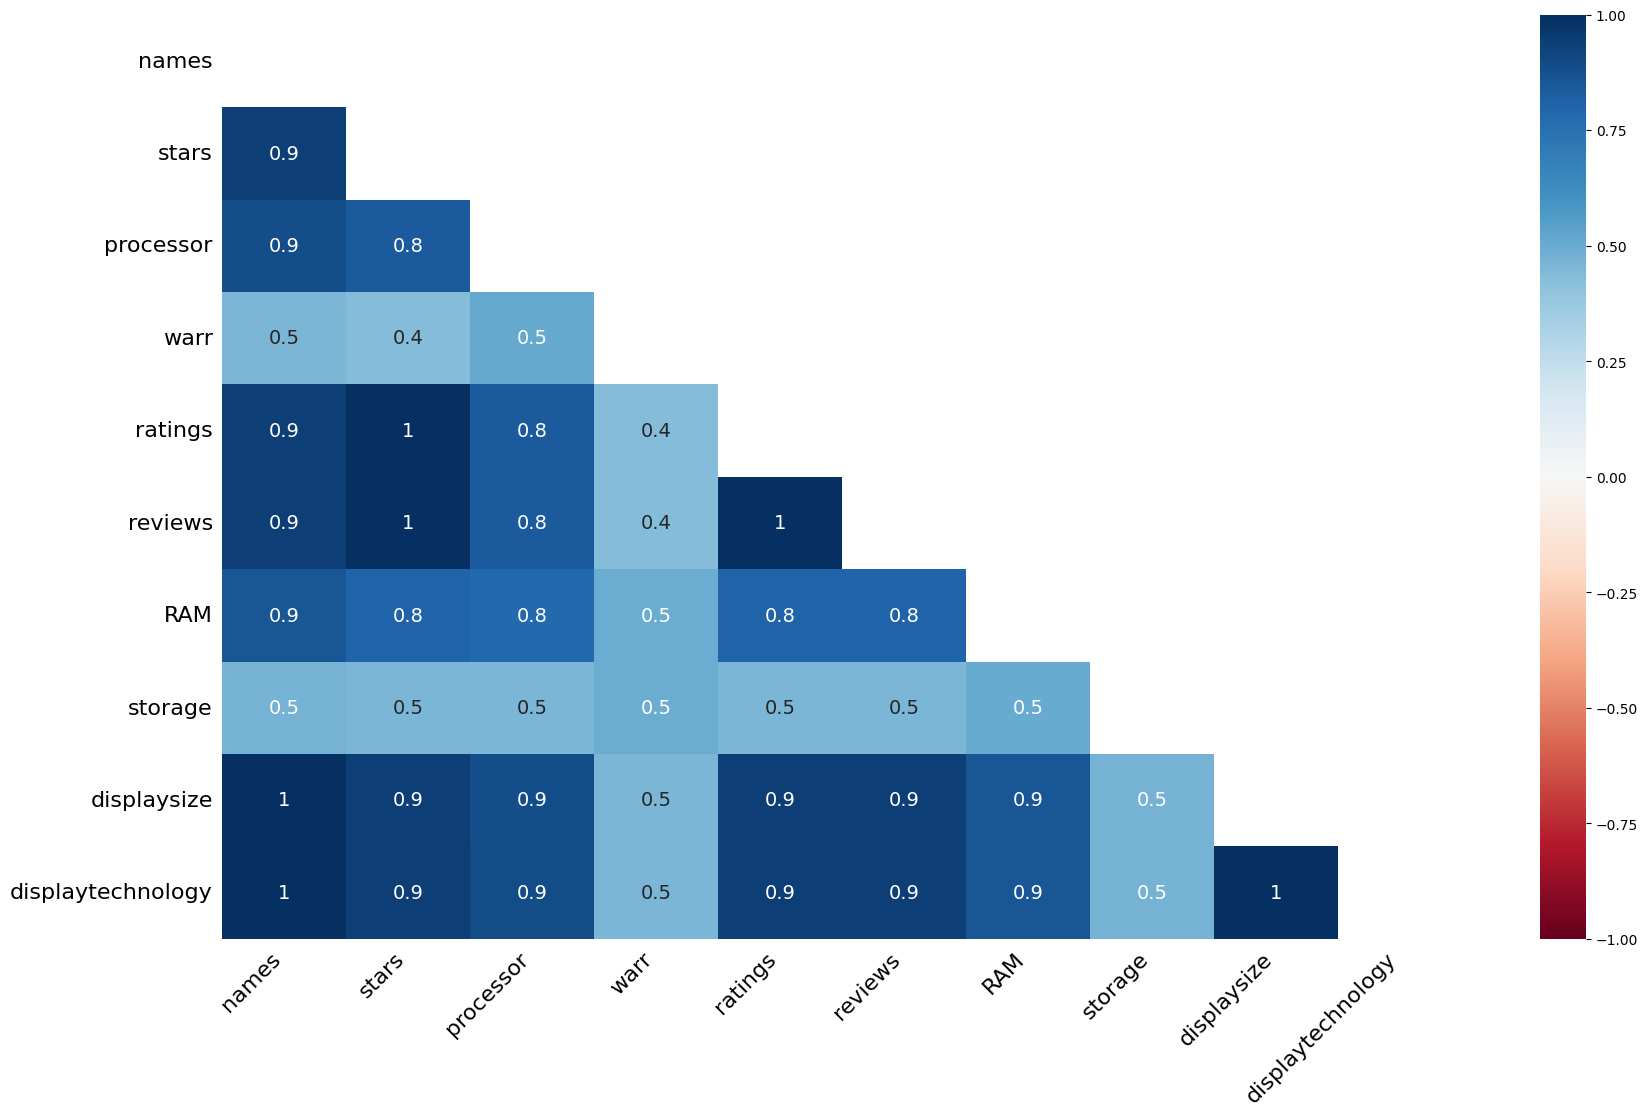

In [650]:
# heatmap
msno.heatmap(mobiles)

#### Dendrogram:

Le tracé du dendrogramme fournit un graphique en forme d'arbre généré par un regroupement hiérarchique et regroupe les colonnes qui ont des corrélations fortes en nullité.

Si un nombre de colonnes sont regroupées au niveau 0 ( exemple ratings, stars et reviews ), ça veut dire la présence de valeurs nulles dans l'une de ces colonnes est directement liée à la présence de valeurs nulles dans les autres colonnes ( exemple la présence de données manquantes dans ratings peut être impactée par la présence de valeurs nulles dans reviews ).

Plus les colonnes de l'arborescence sont séparées, moins la corrélation des valeurs manquantes entre ces colonnes.

Les valeurs situées à gauche représentent le degré de nulleté des groupes. Par exemple le degré de nulleté pour le groupe storage et warr (garantie) est égal à 17 qui est un degré très éleve, càd ces colonnes ont les plus grands nombres de données manquantes (respectivement 564 et 586)

<Axes: >

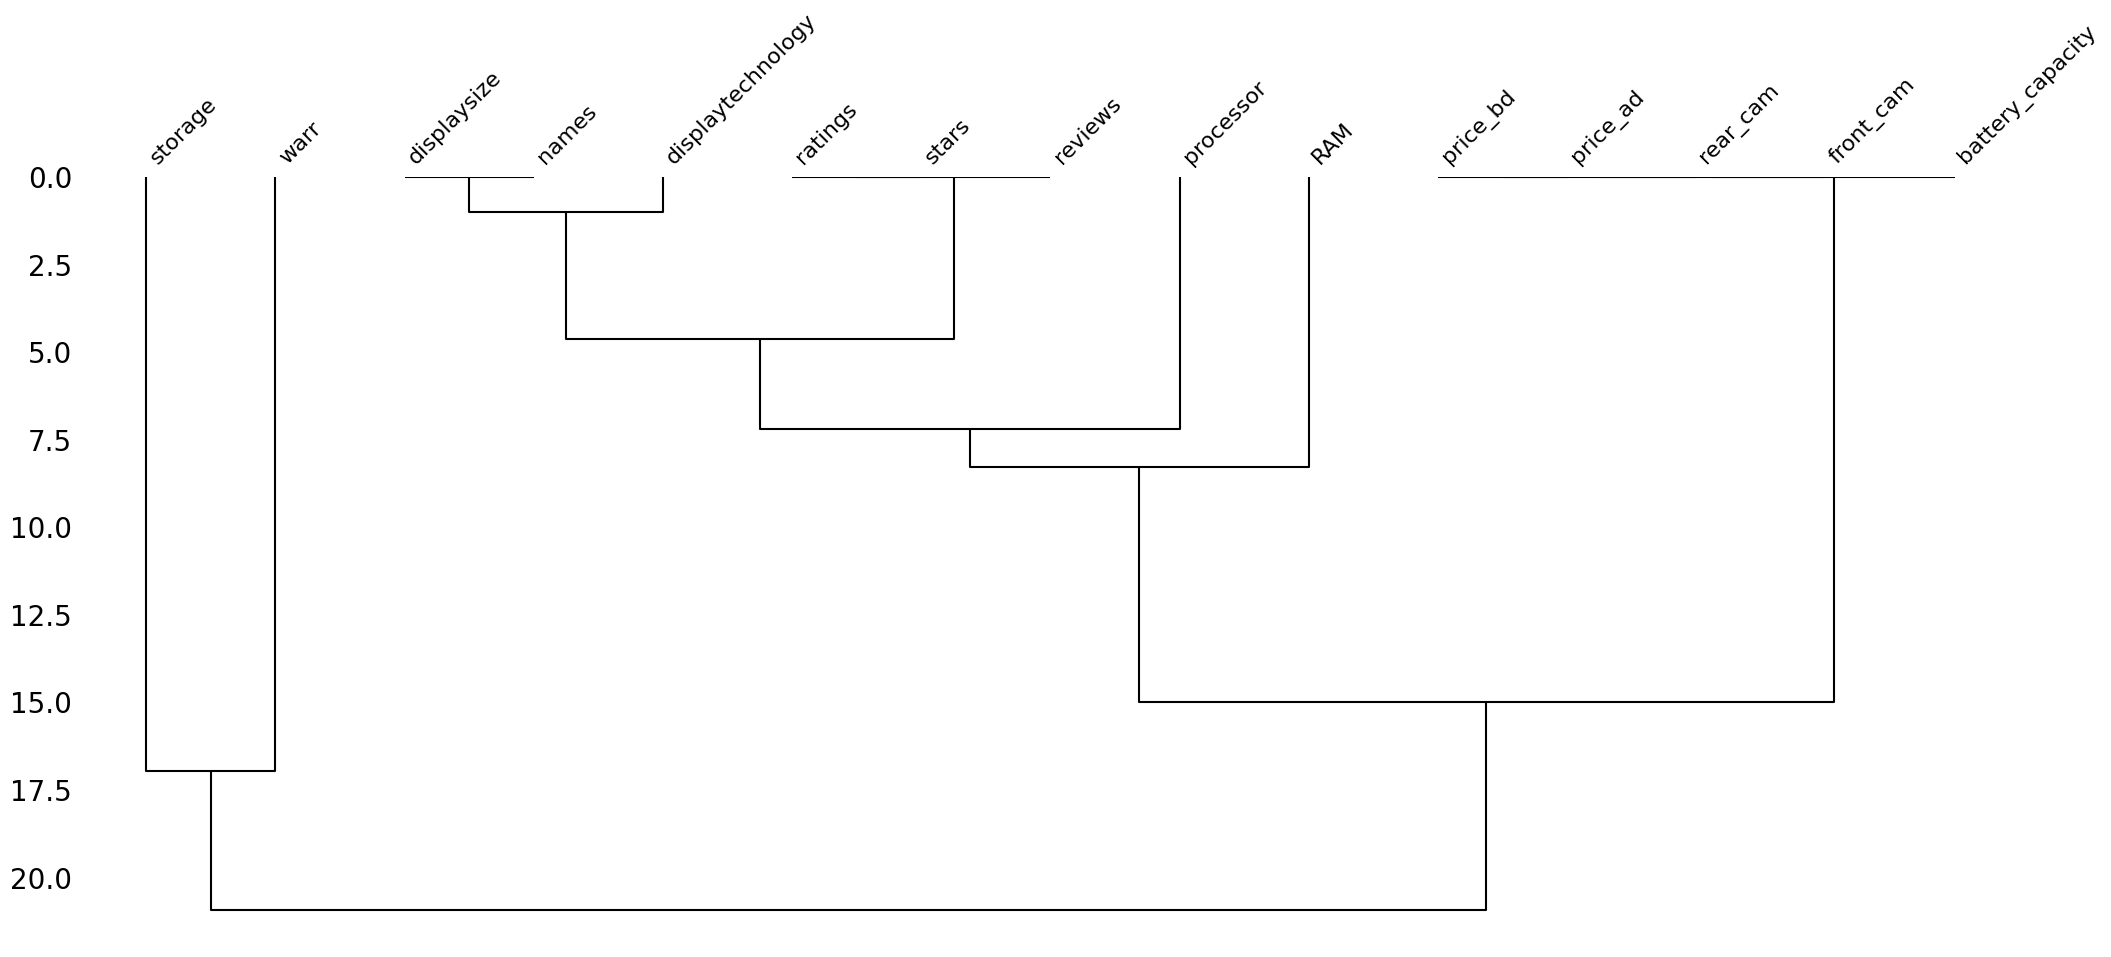

In [651]:
# Dendrogram
msno.dendrogram(mobiles)

### Traitement des données manquantes:

Il existe plusieurs techniques pour nettoyer les données manquantes dans un ensemble de données. Voici quelques-unes des techniques les plus courantes :

- Listwise deletion
- Mean/Median imputation (pour les données numériques)
- Mode imputation (pour les données catégoriques)
- Prediction models imputation (regression, KNN, decision tree...)
- Random sample imputation 

In [652]:
pd.DataFrame(mobiles.names.value_counts())

,names
GREENBERRI VIRAT,42
itel it2163S,42
itel IT5626,41
APPLE iPhone 14,10
POCO M4 Pro,9
...,...
itel MagicX Play,1
Redmi Note 11 PRO Plus 5G,1
Nokia C21 Plus,1
Nokia 5710 XA DS,1


#### Elimination des valeurs dupliquées

In [653]:
# Supprimer les lignes dupliquées
mobiles=mobiles.drop_duplicates(ignore_index=True)
mobiles.shape

(804, 15)

#### Remplacer les données erronnées par NaN

On a des colonnes contenant des données erronnées comme la colonne battery_capacity qui contient le nombre d'années de garantie (1 Year Manufacturer Warranty): ligne 291 et beaucoup d'autres. On doit remplacer ces valeurs par NaN.

In [654]:
mobiles.sample(5)

,names,stars,processor,price_ad,price_bd,rear_cam,front_cam,battery_capacity,warr,ratings,reviews,RAM,storage,displaysize,displaytechnology
427,SAMSUNG Galaxy A23,4.3,Octa-core(EXYNOS) Processor,"19,999","25,490",50,8,5000,365.0,469.0,35.0,8 GB,1 TB,16.76,Full HD+ Display
307,SAMSUNG Galaxy A03 Core,4.0,Octa Core Processor,"6,724","10,499",8,5,5000,365.0,2687.0,237.0,2 GB,1 TB,16.51,HD+ Display
441,ANGAGE ELITE,3.8,1 Month Manufacturing Warranty,879,nan,0.3,nan,2500,NaN,15.0,2.0,64 MB,32 GB,4.5,Display
98,POCO M4 Pro 5G,4.2,Mediatek Dimensity 810 Processor,"14,999","19,999",50,16,5000,180.0,47346.0,4146.0,6 GB,1 TB,16.76,Full HD+ Display
66,Infinix NOTE 12i,4.3,Mediatek Helio G85 Processor,"9,999","12,999",50,8,5000,365.0,669.0,85.0,4 GB,512 GB,17.02,Full HD+ AMOLED Display


Certaines valeurs de la colonne processor contiennent des données concernant la colonne warr (garantie), ces données sont érronnées d'ou on doit les éliminer.
Mais avant ça on a décidé d'imputer les valeurs nulles de la colonne warr par celles de processor (qui sont considérées erronées).

Après avoir fait ça le nombre de données manquantes de la colonne warr a diminué de 586 à 269.

In [655]:
for i in range(len(mobiles)) : 
    if ("Processor" not in str(mobiles.processor.iloc[i])) and (pd.isnull(mobiles.warr.iloc[i])) and not(pd.isnull(mobiles.processor.iloc[i])) :
        o=re.findall(r'\d+',mobiles.loc[i,'processor'])
        if len(o) > 0 : 
            w=o[0]
            mobiles.loc[i,'warr']= w
mobiles['warr']= mobiles['warr'].astype(float)
mobiles['warr'] = mobiles['warr'].apply(lambda x: x*30 if ((x<30) and (x>3)) else x*365 if (x<3) else x)

In [656]:
mobiles.warr.isnull().sum()

195

On a constaté que les valeurs non erronnées de la colonne processor contiennent le mot "Processor" (càd les vraies valeurs de processor), donc on doit remplacer les valeurs erronéées de cette colonne par 'nan'.

Après avoir fait ça le nombre de données manquantes de processor a augmenté de 248 à 408.

In [657]:
for i in range(len(mobiles)) : 
    if ("Processor" not in str(mobiles.processor.iloc[i])):
        mobiles.processor.iloc[i] = np.nan

On a remarqué qu'il y a des valeurs nulles écrites sous forme de "nan" différentes du format standard qui est "NaN", donc on doir remplacer ces valeurs pour pouvoir les traiter plus tard.

In [658]:
mobiles=mobiles.replace('nan', np.nan)
mobiles.isnull().sum()

names                131
stars                152
processor            408
price_ad               1
price_bd             220
rear_cam             131
front_cam            423
battery_capacity     131
warr                 195
ratings              152
reviews              152
RAM                  172
storage              430
displaysize          131
displaytechnology    132
dtype: int64

<Axes: >

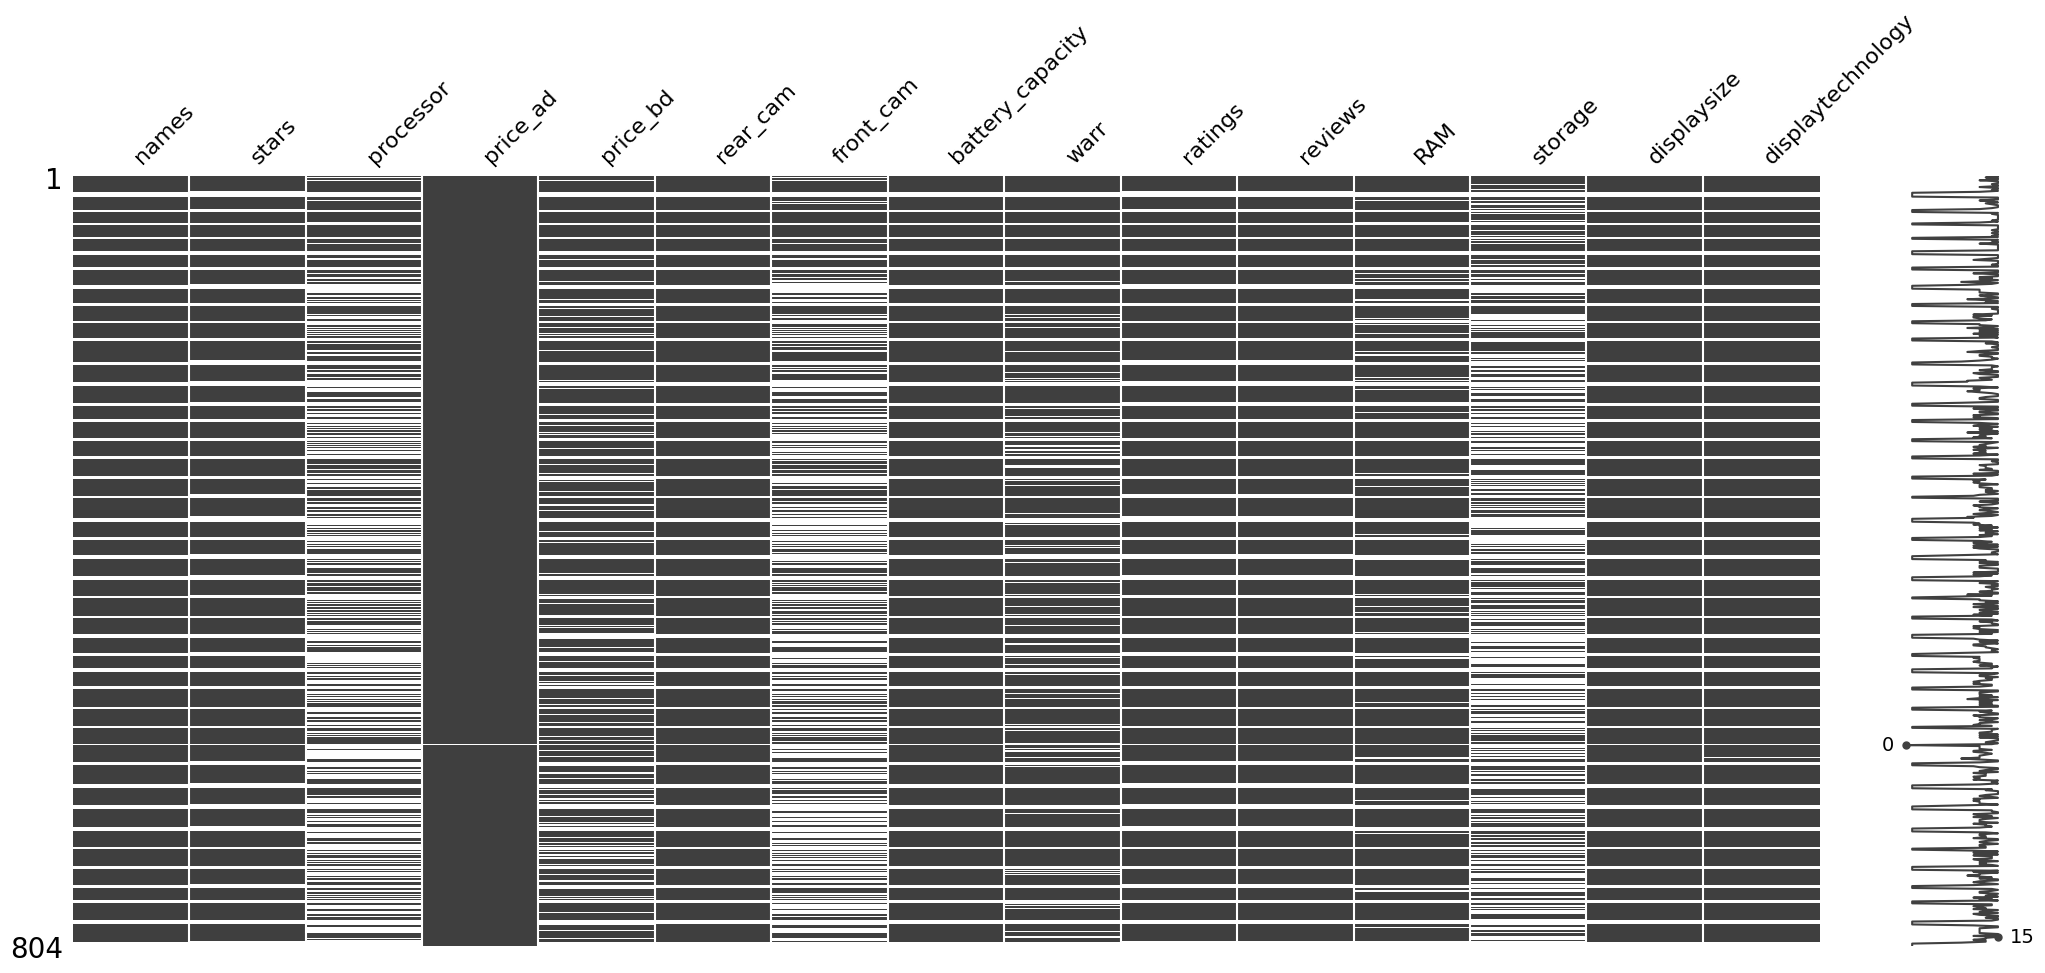

In [659]:
msno.matrix(mobiles)

<Axes: >

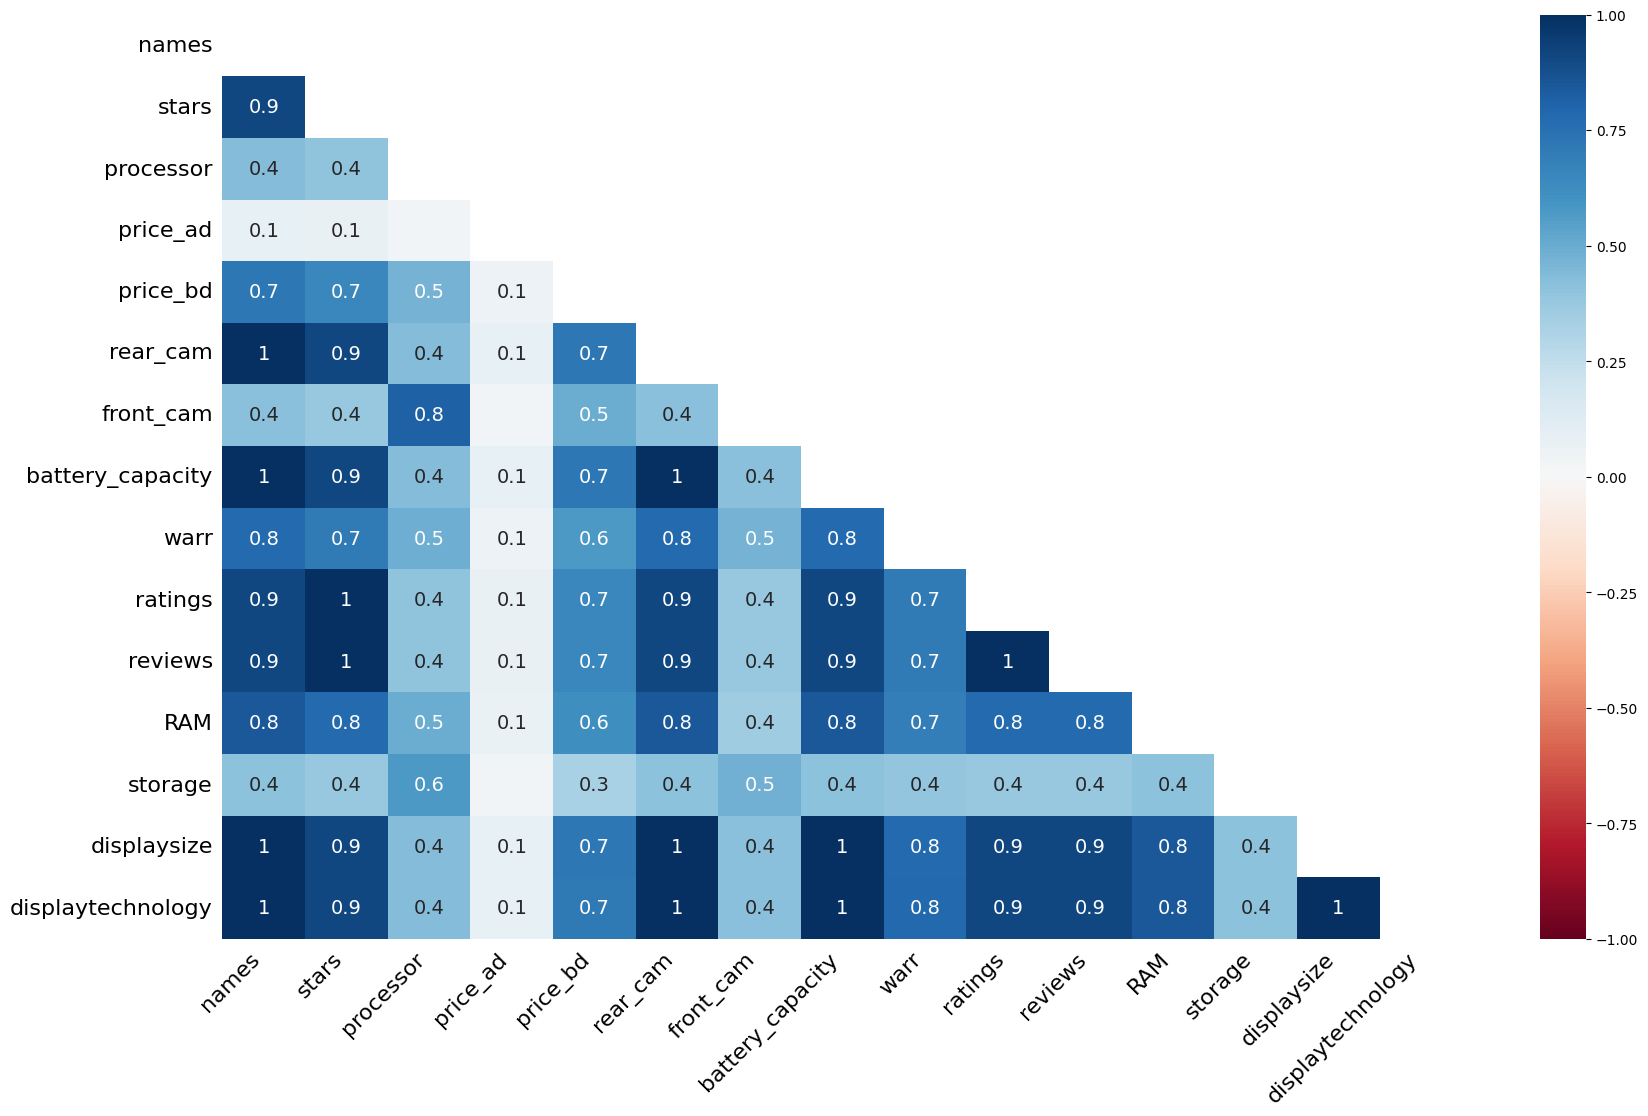

In [660]:
msno.heatmap(mobiles)

<Axes: >

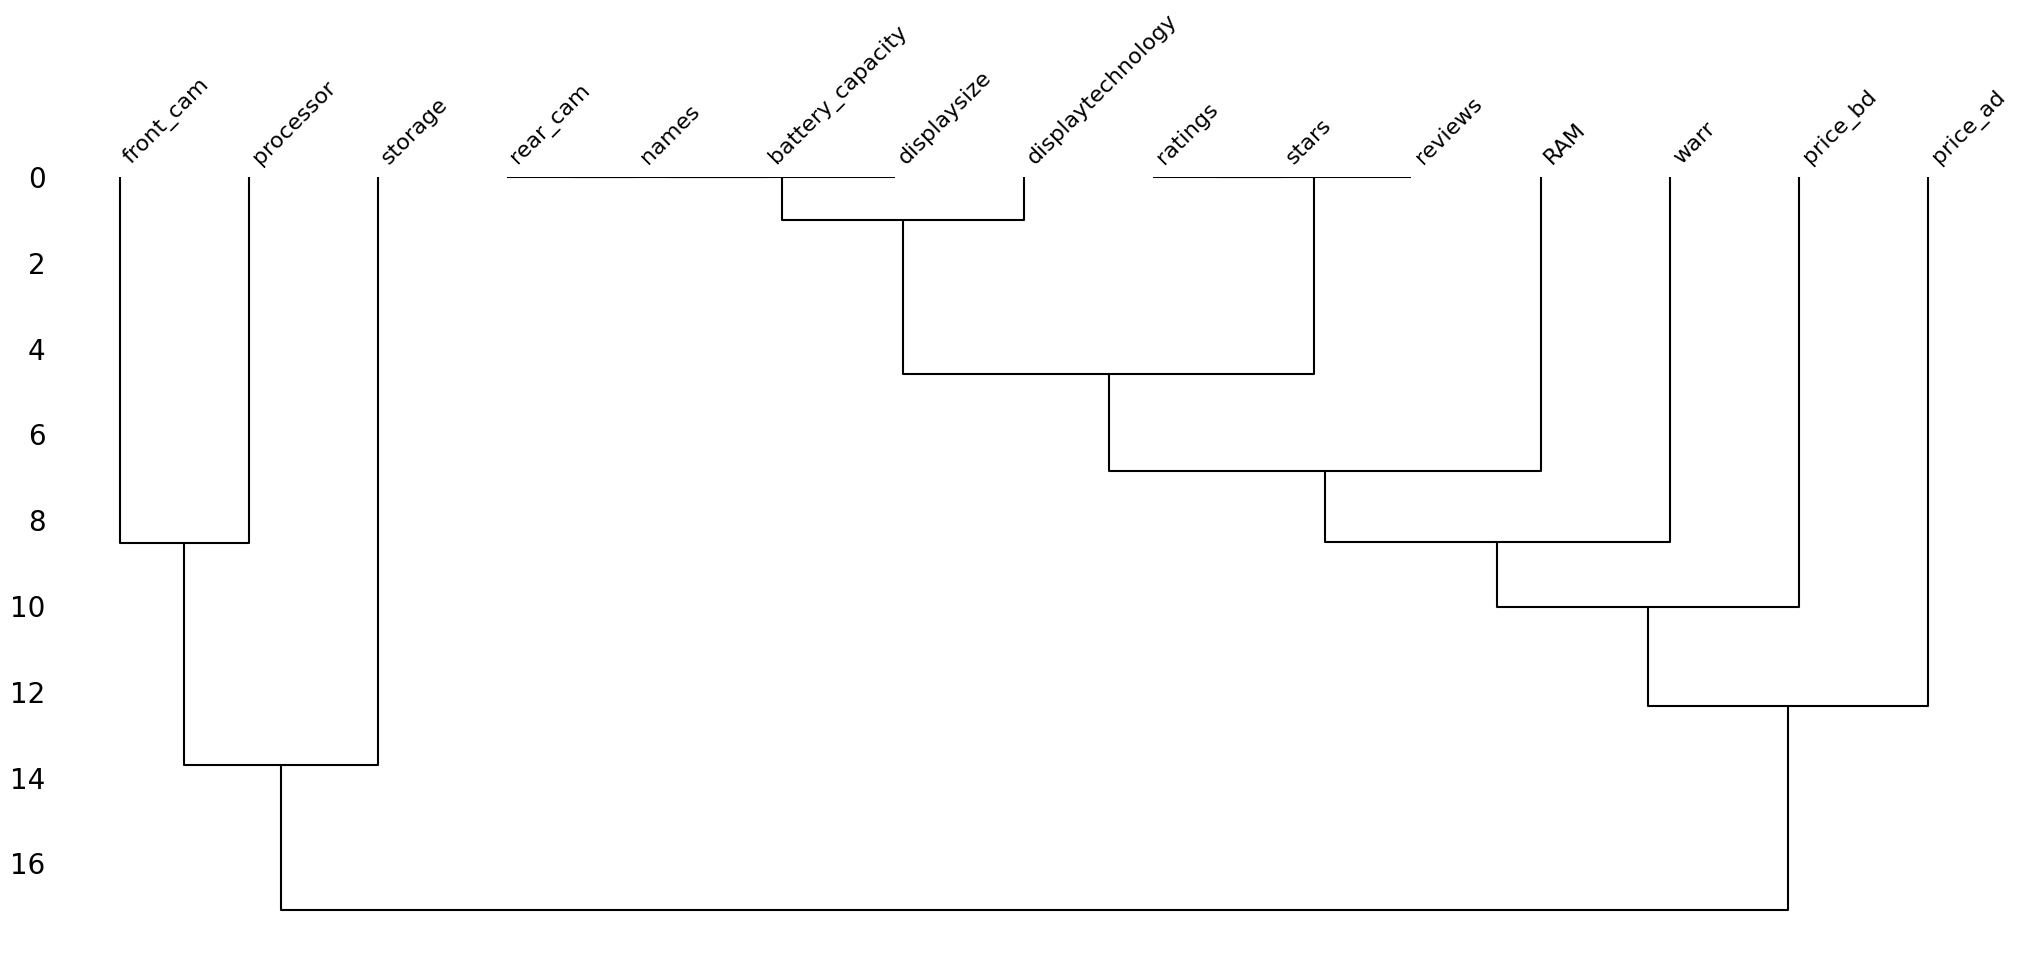

In [661]:
msno.dendrogram(mobiles)

##### Listwise deletion:

On constate que la colonne price_ad contient une seule valeur nulle, à la ligne 593. En l'affichant on remarque que cette ligne ne contient que des valeurs nulles donc on va faire la technique de listwise deletion pour supprimer cette colonne.

De même pour les lignes 800, 801, 802 et 803 qui contiennent une seule valeur non nulle.

In [662]:
mobiles[mobiles.price_ad.isnull()]

,names,stars,processor,price_ad,price_bd,rear_cam,front_cam,battery_capacity,warr,ratings,reviews,RAM,storage,displaysize,displaytechnology
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [663]:
to_delete = [593,800,801,802,803]
mobiles=mobiles.drop( to_delete )

In [664]:
mobiles.tail(5)

,names,stars,processor,price_ad,price_bd,rear_cam,front_cam,battery_capacity,warr,ratings,reviews,RAM,storage,displaysize,displaytechnology
795,vivo V21 5G,4.0,MediaTek Dimensity 800U Processor,"27,990","32,990",64,44,4000,NaN,467.0,53.0,8 GB,NaN,16.36,Full HD+ Display
796,LAVA BEU,4.3,NaN,"5,990",NaN,13,NaN,4060,365.0,142.0,11.0,2 GB,NaN,15.44,Display
797,Tecno Pop 6 Pro,4.1,Unisoc SC9863A Processor,"6,949","7,999",8,NaN,5000,365.0,2741.0,243.0,2 GB,NaN,16.66,HD+ Display
798,Kechaoda K28,4.6,NaN,"1,399","1,499",0.3,NaN,1700,365.0,1828.0,176.0,32 MB,16 GB,6.1,QVGA Display
799,APPLE iPhone 13 Pro Max,NaN,NaN,"1,34,999","1,59,900",12,12,A15 Bionic Chip Processor,365.0,NaN,NaN,NaN,NaN,17.02,Super Retina XDR Display


- colonne names: contient 126 valeurs nulles, on ne peut pas la traiter maintenant car ça peut biaiser la base
- colonne stars: contient 147 valeurs nulles
- processor contient 403 dm
- price_bd contient 215
- rear_cam = 176
- front_cam = 418
- battery_capacity = 149
- warr = 190
- ratings / reviews = 147
- RAM = 167
- storage = 425
- displaysize = 126
- displaytechnology = 127

1) A partir du dendrogram on peut voir qu'il y a quelques colonnes qui sont directement liées, comme stars, ratings et reviews. Ces colonnes sont fortement corrélées et ça indique qu'elles perdent les données ensemble en même temps.

2) display size + names ( + display tech)

 MAR: meaning that the missingness is not related to the missing values themselves but is related to other factors in the dataset.
 MNAR: the missingness is related to the values that are missing.
 MCAR: completely unrelated to the observed or unobserved values in the dataset (may be human error)



On va commencer par utiliser la méthode de KNN pour traiter les valeurs manquantes des colonnes: stars, reviews et ratings.

Ces colonnes sont de type float donc on n'a pas intérêt à les encoder.

In [665]:
mobiles.ratings.dtype

dtype('float64')

In [666]:
import random
random.seed(42)
# Avant imputation
# Exemple de valeurs manquantes dans 'stars', 'reviews', 'ratings'
m = mobiles[['stars', 'reviews', 'ratings']]
m[(pd.isnull(m.reviews)) | (pd.isnull(m.stars))| (pd.isnull(m.ratings))].sample(10)

,stars,reviews,ratings
97,NaN,NaN,NaN
356,NaN,NaN,NaN
216,NaN,NaN,NaN
315,NaN,NaN,NaN
293,NaN,NaN,NaN
398,NaN,NaN,NaN
498,NaN,NaN,NaN
656,NaN,NaN,NaN
377,NaN,NaN,NaN
575,NaN,NaN,NaN


#### Mean imputation
On va utiliser la méthode mean imputation pour imputer les valeurs manquantes des colonnes: 'stars', 'ratings', 'reviews' .

In [667]:
# méthode 1: mobiles[['stars', 'ratings', 'reviews' ]].fillna(mobiles[['stars', 'ratings', 'reviews' ]].mean(), inplace=True)
# méthode 2:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
mobiles[['stars', 'ratings', 'reviews' ]] = mean_imputer.fit_transform(mobiles[['stars', 'ratings', 'reviews' ]])

In [668]:
# Après imputation
mobiles.loc[[134,657,497,50,35],['stars', 'ratings', 'reviews' ]]

,stars,ratings,reviews
134,4.192025,28182.819018,2115.400307
657,4.192025,28182.819018,2115.400307
497,4.192025,28182.819018,2115.400307
50,4.192025,28182.819018,2115.400307
35,4.192025,28182.819018,2115.400307


In [669]:
mobiles[['stars', 'ratings', 'reviews' ]].isnull().sum()

stars      0
ratings    0
reviews    0
dtype: int64

#### KNN imputation

Pour imputer les colonnes rear_cam, names, battery_capacity, displaysize, on va commencer par convertir rear_cam et battery_capacity en float.

On remarque ici que rear_cam contient des caractéristiques qui concernent battery_capacity et battery_capacity contient des infos de warr (garantie).

In [670]:
mobiles.loc[:,["rear_cam","battery_capacity","warr"]] [(mobiles.rear_cam.str.find("Battery")!=-1) & ~(pd.isnull(mobiles.rear_cam))]

,rear_cam,battery_capacity,warr
1,1200 mAh Lithium Ion Battery,7 Days Battery Backup with 1200,270.0
101,800 mAh Battery,0 0 0 208MHz Processor,365.0
110,800 mAh Battery,1 Year Manufacturer Warranty,NaN
128,800 mAh Battery,0 0 0 0 Processor Processor,365.0
144,1000 mAh Battery,1 Year Manufacturer warranty,NaN
174,1200 mAh Lithium Ion Battery,7 Days Battery Backup with 1200,270.0
183,800 mAh Battery,1 Year Manufacturer Warranty,NaN
205,800 mAh Battery,1 Year Manufacturer Warranty,NaN
213,1750 mAh Battery,2 Year Replacement,NaN
224,1750 mAh Battery,2 Year Replacement,NaN


On va transférer les carac de la batterie qui existent dans rear_cam vers la colonne battery_capacity et les supprimer de la colonne rear_cam.

In [671]:
mobile2=mobiles.copy(deep=True)
mobile2=mobile2.loc[:,"battery_capacity"]
mobile2.loc[:] \
    [(mobiles.rear_cam.str.find("Battery")!=-1) & ~(pd.isnull(mobiles.rear_cam))] = mobiles.loc[:,"rear_cam"][(mobiles.rear_cam.str.find("Battery")!=-1) & ~(pd.isnull(mobiles.rear_cam))]

mobiles.loc[:,"battery_capacity"]=mobile2

Enlever les instances dans rear_cam ayant des valeurs avec Battery

In [672]:
mobile2=mobiles.copy(deep=True)
mobile2=mobile2.loc[:,"rear_cam"]
mobile2.loc[:][(mobiles.rear_cam.str.find("Battery")!=-1) & ~(pd.isnull(mobiles.rear_cam))] = np.nan

mobiles.loc[:,"rear_cam"]=mobile2

In [673]:
mobiles.rear_cam.unique()

array(['50', nan, '13Mp + AI Lens ', '2', '13', '64', '12', '8', '0.3',
       '0', '48', '108', '50 ', '5', '1.3', '1', '8 ', '12.2', '0.08',
       '200', '0.8', '16', '0.03', '32'], dtype=object)

In [674]:
mobiles.rear_cam=mobiles.rear_cam.replace('13Mp + AI Lens ','13')
# Convertir rear_cam et front_cam en float
mobiles.rear_cam=mobiles.rear_cam.astype(float)
mobiles.front_cam=mobiles.front_cam.astype(float)

Enlever les instances dans battery_capacity ayant des valeurs avec Processor

In [675]:
mobiles.battery_capacity.unique()
#Enlever les "Processors" des battery_capacity
mobiles.battery_capacity=mobiles.battery_capacity.replace(list(mobiles.battery_capacity[(mobiles.battery_capacity.str.find("Processor")!=-1) & ~(pd.isnull(mobiles.rear_cam))].unique()),np.nan)

mobiles['battery_capacity']=mobiles['battery_capacity'].str.extract(r'(\d+)')
mobiles.battery_capacity=mobiles.battery_capacity.astype(float)

 On remarque que la ligne 607 de displaysize cotient une info concernant rear_cam, on va transférer celle-ci à rear_cam et la supprimer de displaysize

In [676]:
mobiles.displaysize[mobiles.displaysize=='2MP Rear Camera']

607    2MP Rear Camera
Name: displaysize, dtype: object

In [677]:
# transférér l'info à rear_cam
mobiles.loc[607, 'rear_cam'] = 2

# supprimer l'info de diplsaysize
mobiles.displaysize[mobiles.displaysize=='2MP Rear Camera'] = np.nan

# Convertir displaysize en float
mobiles.displaysize.astype('float')
 

0      16.76
1       4.57
2      16.76
3      17.32
4       4.57
       ...  
795    16.36
796    15.44
797    16.66
798     6.10
799    17.02
Name: displaysize, Length: 799, dtype: float64

In [678]:
#Avant imputation
# Exemple de valeurs manquantes dans 'rear_cam', 'battery_capacity' et 'displaysize'
random.seed(42)
m2 = mobiles[['rear_cam', 'battery_capacity', 'displaysize', 'RAM', 'front_cam']]
m2[(pd.isnull(m2.rear_cam)) | (pd.isnull(m2.battery_capacity))| (pd.isnull(m2.displaysize)) | (pd.isnull(m2.RAM)) | (pd.isnull(m2.front_cam))].sample(5,random_state=1)

,rear_cam,battery_capacity,displaysize,RAM,front_cam
485,108.0,5000.0,16.94,6 GB,NaN
528,0.3,800.0,3.56,32 MB,NaN
372,0.8,2575.0,6.1,24 MB,NaN
792,NaN,800.0,4.5,4 MB,NaN
658,NaN,NaN,NaN,NaN,NaN


On doit convertir la colonne de RAM pour la rendre en même unité.

In [679]:
mobiles.RAM.dtype

dtype('O')

In [680]:
mobiles.RAM.unique()

array(['4 GB ', '4 MB ', '64 MB ', '8 GB ', '6 GB ', nan, '2 GB ',
       '8 MB ', '32 MB ', '3 GB ', '30 MB ', '12 GB ', '56 MB ', '24 MB ',
       '153 MB ', '31 MB ', '48 MB ', '0.046875 GB ', '128 MB ', '1 GB ',
       '52 MB ', '0.53 '], dtype=object)

In [681]:
filter = mobiles.RAM[(mobiles.RAM.str.find('GB')!=-1) & ~(pd.isnull(mobiles.RAM))]
a=filter.str.extract(r'(\d+)')
a=a.astype(float)
a= a*1024
pd.DataFrame(filter)
mobiles.iloc[:,-4][(mobiles.RAM.str.find('GB')!=-1) & ~(pd.isnull(mobiles.RAM))]=a.iloc[:,0]



Supprimer GB et MB et convertir en float

In [682]:
mobiles.RAM[~(mobiles.RAM.str.find('GB')!=-1) & ~(pd.isnull(mobiles.RAM))]= \
    mobiles.RAM[~(mobiles.RAM.str.find('GB')!=-1) & ~(pd.isnull(mobiles.RAM))].str.extract(r'(\d+)').iloc[:,0]
mobiles.RAM=mobiles.RAM.astype(float)

Imputation des colonnes rear_cam, battery_capacity, displaysize et RAM avec KNN

In [683]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
mobiles[['rear_cam', 'battery_capacity', 'displaysize', 'RAM', 'front_cam']] = pd.DataFrame(imputer.fit_transform(mobiles.loc[:,['rear_cam', 'battery_capacity', 'displaysize' , 'RAM', 'front_cam'] ]), columns=['rear_cam', 'battery_capacity', 'displaysize', 'RAM' , 'front_cam'])


In [792]:
mobiles.displaytechnology.value_counts()

 Full HD+ Display                    502
 HD+ Display                         122
 QVGA Display                         51
 Full HD+ AMOLED Display              38
 Quarter QVGA Display                 33
 Super Retina XDR Display             19
 Full HD+ Super AMOLED Display         8
 Full HD Display                       8
 HD Display                            6
 Liquid Retina HD Display              3
 FWVGA Display                         2
 WVGA Display                          2
 Full HD+ E3 Super AMOLED Display      1
 Quad HD+ Display                      1
 VGA Display                           1
 FWVGA+ Display                        1
Name: displaytechnology, dtype: int64

In [684]:
# Après imputation
mobiles.loc[[401,666,741,725], ['rear_cam', 'battery_capacity', 'displaysize', 'RAM', 'front_cam' ]]

,rear_cam,battery_capacity,displaysize,RAM,front_cam
401,13.000000,5000.000000,16.590000,3072.000000,6.200000
666,48.000000,5020.000000,16.590000,4096.000000,12.800000
741,31.428718,3732.373846,12.862024,3753.427215,12.496588
725,50.000000,5000.000000,16.660000,4096.000000,8.000000


In [685]:
mobiles.isnull().sum()

names                126
stars                  0
processor            403
price_ad               0
price_bd             215
rear_cam               1
front_cam              1
battery_capacity       1
warr                 190
ratings                0
reviews                0
RAM                    1
storage              425
displaysize            1
displaytechnology    127
dtype: int64

Convertir price_ad et price_bd en float

In [686]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
mobile2=mobiles.copy(deep=True)
mobile2=mobile2.iloc[:,3]
for i in range(len(mobiles.price_ad)) :
    mobile2.iloc[i]=locale.atof(str(mobiles.price_ad.iloc[i]))
mobile2=mobile2.astype(float)
mobiles.price_ad=mobile2

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
mobile2=mobiles.copy(deep=True)
mobile2=mobile2.iloc[:,4]
for i in range(len(mobiles.price_bd)) :
    mobile2.iloc[i]=locale.atof(str(mobiles.price_bd.iloc[i]))
mobile2=mobile2.astype(float)
mobiles.price_bd=mobile2

#### Regression imputation
On va utiliser regression imputation pour imputer les valeurs manquantes de la colonne price_bd

In [687]:
# Avant imputation
random.seed(42)
m3 = mobiles[['price_bd' ]]
m3[(pd.isnull(m3.price_bd))].sample(10)

,price_bd
20,NaN
758,NaN
171,NaN
255,NaN
316,NaN
521,NaN
36,NaN
514,NaN
506,NaN
705,NaN


D'après la matrice des correlations on peut voir que price_bd est fortement corrélé avec price_ad, donc on peut utiliser la méthode de régression linéaire.

In [688]:
corr_mobiles = mobiles.corr()
corr_mobiles

,stars,price_ad,price_bd,rear_cam,front_cam,battery_capacity,warr,ratings,reviews,RAM,displaysize
stars,1.000000,0.010723,0.337698,0.239561,0.057553,0.382402,-0.048658,0.383312,0.327544,0.322126,0.381751
price_ad,0.010723,1.000000,0.985438,0.016805,0.019085,0.014293,0.019220,0.003304,0.003138,0.018273,0.019694
price_bd,0.337698,0.985438,1.000000,0.269686,0.245510,0.291967,0.040368,0.091597,0.094367,0.435951,0.327858
rear_cam,0.239561,0.016805,0.269686,1.000000,0.485901,0.613184,0.009792,0.016802,0.042539,0.787771,0.637021
front_cam,0.057553,0.019085,0.245510,0.485901,1.000000,0.054387,-0.073151,-0.065030,-0.020218,0.412749,0.110471
battery_capacity,0.382402,0.014293,0.291967,0.613184,0.054387,1.000000,0.006362,0.153162,0.127884,0.754430,0.966484
warr,-0.048658,0.019220,0.040368,0.009792,-0.073151,0.006362,1.000000,-0.103825,-0.123228,0.033865,0.014758
ratings,0.383312,0.003304,0.091597,0.016802,-0.065030,0.153162,-0.103825,1.000000,0.955163,0.051939,0.146382
reviews,0.327544,0.003138,0.094367,0.042539,-0.020218,0.127884,-0.123228,0.955163,1.000000,0.059446,0.123466
RAM,0.322126,0.018273,0.435951,0.787771,0.412749,0.754430,0.033865,0.051939,0.059446,1.000000,0.806579


In [689]:
# création d'un subset de données ne contenant pas des valeurs manquantes dans price_ad et price_bd
df_price_ad_bd = mobiles.dropna(axis = 0, subset = ['price_bd', 'price_ad'])
df_price_ad_bd = df_price_ad_bd.loc[:, ['price_bd', 'price_ad']]

# les valeurs manquantes dans price_bd
missing_pricebd = mobiles['price_bd'].isnull()

# extraction des observations de price_ad quand price_bd est manquante
price_missbd = pd.DataFrame(mobiles['price_ad'][missing_pricebd])


In [690]:
# Select 'price_ad' as the predictor variable X and 'price_bd' as the target variable y.
X = df_price_ad_bd[['price_ad']]
y = df_price_ad_bd[['price_bd']]

# trainer un model de reg linéaire pour prédire les valeurs de price_bd en utilisant 80% training data et 20% testing
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import LinearRegression

# fit a linear model on training data
lm = LinearRegression().fit(X_train, y_train)

# Use the predict() method of the fitted model to predict the missing values of 'price_bd' for the 'price_ad' values stored in price_missbd. The predicted values are stored in pricebd_pred.
# utiliser le fitted model et les valeurs de price_ad pour prédire les vm de price bd
pricebd_pred = lm.predict(price_missbd)

# Assign the predicted 'price_bd' values to the corresponding rows in the 'mobiles' DataFrame
mobiles.loc[missing_pricebd, 'price_bd'] = pricebd_pred

In [691]:
# Après imputation
mobiles.loc[[678, 195, 721, 50, 702], 'price_bd']

678    5.555624e+03
195    1.949787e+06
721    1.720547e+06
50     1.663247e+06
702    9.223265e+03
Name: price_bd, dtype: float64

In [692]:
# overview of the columns
mobiles[['price_bd', 'price_ad']].sample(10)

,price_bd,price_ad
646,1.890000e+03,1590.0
418,1.318366e+06,1149020.0
425,1.999000e+04,15499.0
75,1.199900e+04,9999.0
612,1.132215e+05,97537.0
339,1.499000e+03,1170.0
439,1.101074e+05,94820.0
308,2.399900e+04,20999.0
107,6.490000e+04,56999.0
76,1.999900e+04,15499.0


As we can see in the graph, the scatter plot of the imputed values and true missing values aligns along a straight line which means that the imputed price_bd values from a simple linear model from price_ad are an exact recovery of the true missing values.

This means that the imputation method is performing well.

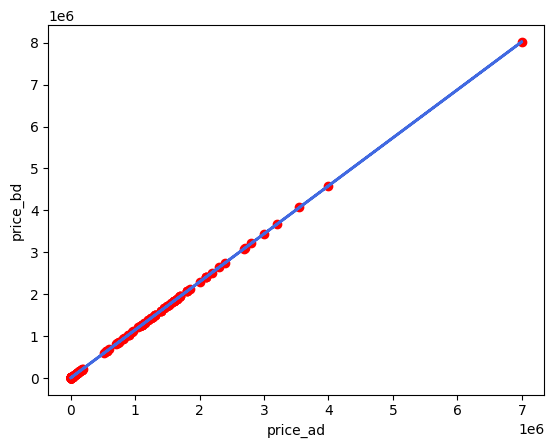

In [693]:
# visulize the imputed price_bd comparing to its true missing values 
plt.scatter(price_missbd, mobiles['price_bd'][missing_pricebd], color='red') #l7mor houma true mv
plt.plot(price_missbd, pricebd_pred, color='royalblue', linewidth=2) #ligne représente l imputed values
plt.xlabel("price_ad")
plt.ylabel("price_bd")
plt.show()


In [694]:
mobiles.isnull().sum()

names                126
stars                  0
processor            403
price_ad               0
price_bd               0
rear_cam               1
front_cam              1
battery_capacity       1
warr                 190
ratings                0
reviews                0
RAM                    1
storage              425
displaysize            1
displaytechnology    127
dtype: int64

#### Mode imputation
On va utiliser mode imputation pour processor et displaytechnology

On  remarque qu'il y a des valeurs erronées dans la colonne displaytechnology (dipslay et NA display), on va les remplacer par nan.

In [695]:
# vérification
mobiles.displaytechnology.unique()

array([' Full HD+ Display', ' Quarter QVGA Display', ' HD+ Display',
       ' Display', ' Full HD+ AMOLED Display',
       ' Super Retina XDR Display', nan, ' HD Display',
       ' Liquid Retina HD Display', ' QVGA Display', ' NA Display',
       ' Full HD+ Super AMOLED Display', ' Full HD Display',
       ' Full HD+ E3 Super AMOLED Display', ' Quad HD+ Display',
       ' FWVGA Display', ' WVGA Display', ' VGA Display',
       ' FWVGA+ Display'], dtype=object)

In [696]:
# remplacer les valeurs erronnées par nan

for disp in [' Display', ' NA Display']:
    mobiles['displaytechnology'].replace(disp, np.nan, inplace=True)
#mobiles.loc[:][(mobiles.displaytechnology == ' Display') | (mobiles.displaytechnology == ' NA Display')] = np.nan

    

In [697]:
# revérification
mobiles.displaytechnology.unique()

array([' Full HD+ Display', ' Quarter QVGA Display', ' HD+ Display', nan,
       ' Full HD+ AMOLED Display', ' Super Retina XDR Display',
       ' HD Display', ' Liquid Retina HD Display', ' QVGA Display',
       ' Full HD+ Super AMOLED Display', ' Full HD Display',
       ' Full HD+ E3 Super AMOLED Display', ' Quad HD+ Display',
       ' FWVGA Display', ' WVGA Display', ' VGA Display',
       ' FWVGA+ Display'], dtype=object)

In [ ]:
mobiles.processor.replace(["NA Processor","0 0 0 208MHz Processor"],np.nan) #Remplacer les intrus par NaN
for i in mobiles.processor.unique() : print (i)

In [698]:
# Avant imputation
random.seed(24)
m4 = mobiles[['processor', 'displaytechnology']]
m4[(pd.isnull(m4.processor)) | (pd.isnull(m4.displaytechnology))].sample(10)

,processor,displaytechnology
171,NaN,NaN
36,NaN,NaN
747,NaN,Liquid Retina HD Display
754,NaN,NaN
358,NaN,NaN
555,NaN,NaN
712,NaN,NaN
713,NaN,NaN
407,NaN,QVGA Display
20,NaN,NaN


In [699]:
mode_imputer = SimpleImputer(strategy='most_frequent')
mobiles[['processor', 'displaytechnology']] = mode_imputer.fit_transform(mobiles[['processor', 'displaytechnology']])

In [700]:
# Après imputation
mobiles.loc[[604, 446, 658, 264, 96,113,81,476],['processor', 'displaytechnology']]

,processor,displaytechnology
604,Qualcomm Snapdragon 680 Processor,Full HD+ Display
446,Qualcomm Snapdragon 680 Processor,Full HD+ Display
658,Qualcomm Snapdragon 680 Processor,Full HD+ Display
264,Qualcomm Snapdragon 680 Processor,Full HD+ Display
96,Qualcomm Snapdragon 680 Processor,Full HD+ Display
113,Qualcomm Snapdragon 680 Processor,Quarter QVGA Display
81,Qualcomm Snapdragon 680 Processor,Full HD+ Display
476,Qualcomm Snapdragon 680 Processor,Super Retina XDR Display


In [701]:
mobiles.isnull().sum()

names                126
stars                  0
processor              0
price_ad               0
price_bd               0
rear_cam               1
front_cam              1
battery_capacity       1
warr                 190
ratings                0
reviews                0
RAM                    1
storage              425
displaysize            1
displaytechnology      0
dtype: int64

In [702]:
mobiles.warr.unique()

array([365., 270., 180.,  nan, 100., 360.,  67., 144.,  68.,  33., 730.,
       120., 540., 950.,  30.,  90., 610.])

#### Median imputation
On va utiliser median imputation pour les colonnes storage et warr

Avant l'imputation, on doit convertir les valeurs des colonnes storage à la même unité

In [703]:
mobiles['storage'] = mobiles['storage'].str.extract(r'(\d+)')
mobiles['storage'] = mobiles['storage'].astype(float)
mobiles['storage'] = mobiles['storage'].apply(lambda x: x*1024 if ((x<=512) and (x>3)) else x*1048576 if (x<3) else x)
mobiles['storage'].iloc[523]=32
mobiles['storage'].iloc[763]=32

In [704]:
# Avant imputation
random.seed(24)
m5 = mobiles[['warr', 'storage']]
m5[(pd.isnull(m5.warr)) | (pd.isnull(m5.storage))].sample(10)

,warr,storage
476,365.0,NaN
217,NaN,NaN
712,365.0,NaN
276,NaN,NaN
716,365.0,NaN
563,365.0,NaN
483,365.0,NaN
577,365.0,NaN
464,365.0,NaN
35,NaN,NaN


In [705]:
median_imputer = SimpleImputer(strategy='median')
mobiles[['warr','storage']] = median_imputer.fit_transform(mobiles[['warr','storage']])

In [706]:
# Après imputation 
mobiles.loc[[770, 65, 741, 172, 620, 260], ['warr', 'storage'] ]

,warr,storage
770,365.0,524288.0
65,365.0,524288.0
741,365.0,524288.0
172,365.0,524288.0
620,365.0,524288.0
260,365.0,524288.0


In [707]:
mobiles.isnull().sum()

names                126
stars                  0
processor              0
price_ad               0
price_bd               0
rear_cam               1
front_cam              1
battery_capacity       1
warr                   0
ratings                0
reviews                0
RAM                    1
storage                0
displaysize            1
displaytechnology      0
dtype: int64

#### Constant imputation
On va utiliser constant imputation pour imputer les valeurs manquantes de la colonne names

In [708]:
# Avant imputation
m6 = mobiles[['names']]
m6[(pd.isnull(m6.names))].sample(5)

,names
358,NaN
613,NaN
170,NaN
95,NaN
294,NaN


In [709]:
constant_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
mobiles[['names']] = constant_imputer.fit_transform(mobiles[['names']])

In [710]:
# Après imputation
mobiles.names.loc[[64, 35, 153, 315, 97]]

64     Unknown
35     Unknown
153    Unknown
315    Unknown
97     Unknown
Name: names, dtype: object

In [711]:
mobiles = mobiles.drop(799)

In [712]:
mobiles.tail()

,names,stars,processor,price_ad,price_bd,rear_cam,front_cam,battery_capacity,warr,ratings,reviews,RAM,storage,displaysize,displaytechnology
794,vivo V21 5G,4.3,MediaTek Dimensity 800U Processor,23990.0,32990.000000,64.0,44.0,4000.0,365.0,17123.0,1704.0,8192.0,524288.0,16.36,Full HD+ Display
795,vivo V21 5G,4.0,MediaTek Dimensity 800U Processor,27990.0,32990.000000,13.0,12.0,4060.0,365.0,467.0,53.0,2048.0,524288.0,15.44,Full HD+ Display
796,LAVA BEU,4.3,Qualcomm Snapdragon 680 Processor,5990.0,8296.039429,8.0,5.6,5000.0,365.0,142.0,11.0,2048.0,524288.0,16.66,Full HD+ Display
797,Tecno Pop 6 Pro,4.1,Unisoc SC9863A Processor,6949.0,7999.000000,0.3,12.0,1700.0,365.0,2741.0,243.0,32.0,524288.0,6.10,HD+ Display
798,Kechaoda K28,4.6,Qualcomm Snapdragon 680 Processor,1399.0,1499.000000,12.0,12.0,4900.0,365.0,1828.0,176.0,3686.4,16384.0,17.02,QVGA Display


In [713]:
mobiles.isnull().sum()

names                0
stars                0
processor            0
price_ad             0
price_bd             0
rear_cam             0
front_cam            0
battery_capacity     0
warr                 0
ratings              0
reviews              0
RAM                  0
storage              0
displaysize          0
displaytechnology    0
dtype: int64

### Visualisation après le traitement des données manquantes

<Axes: >

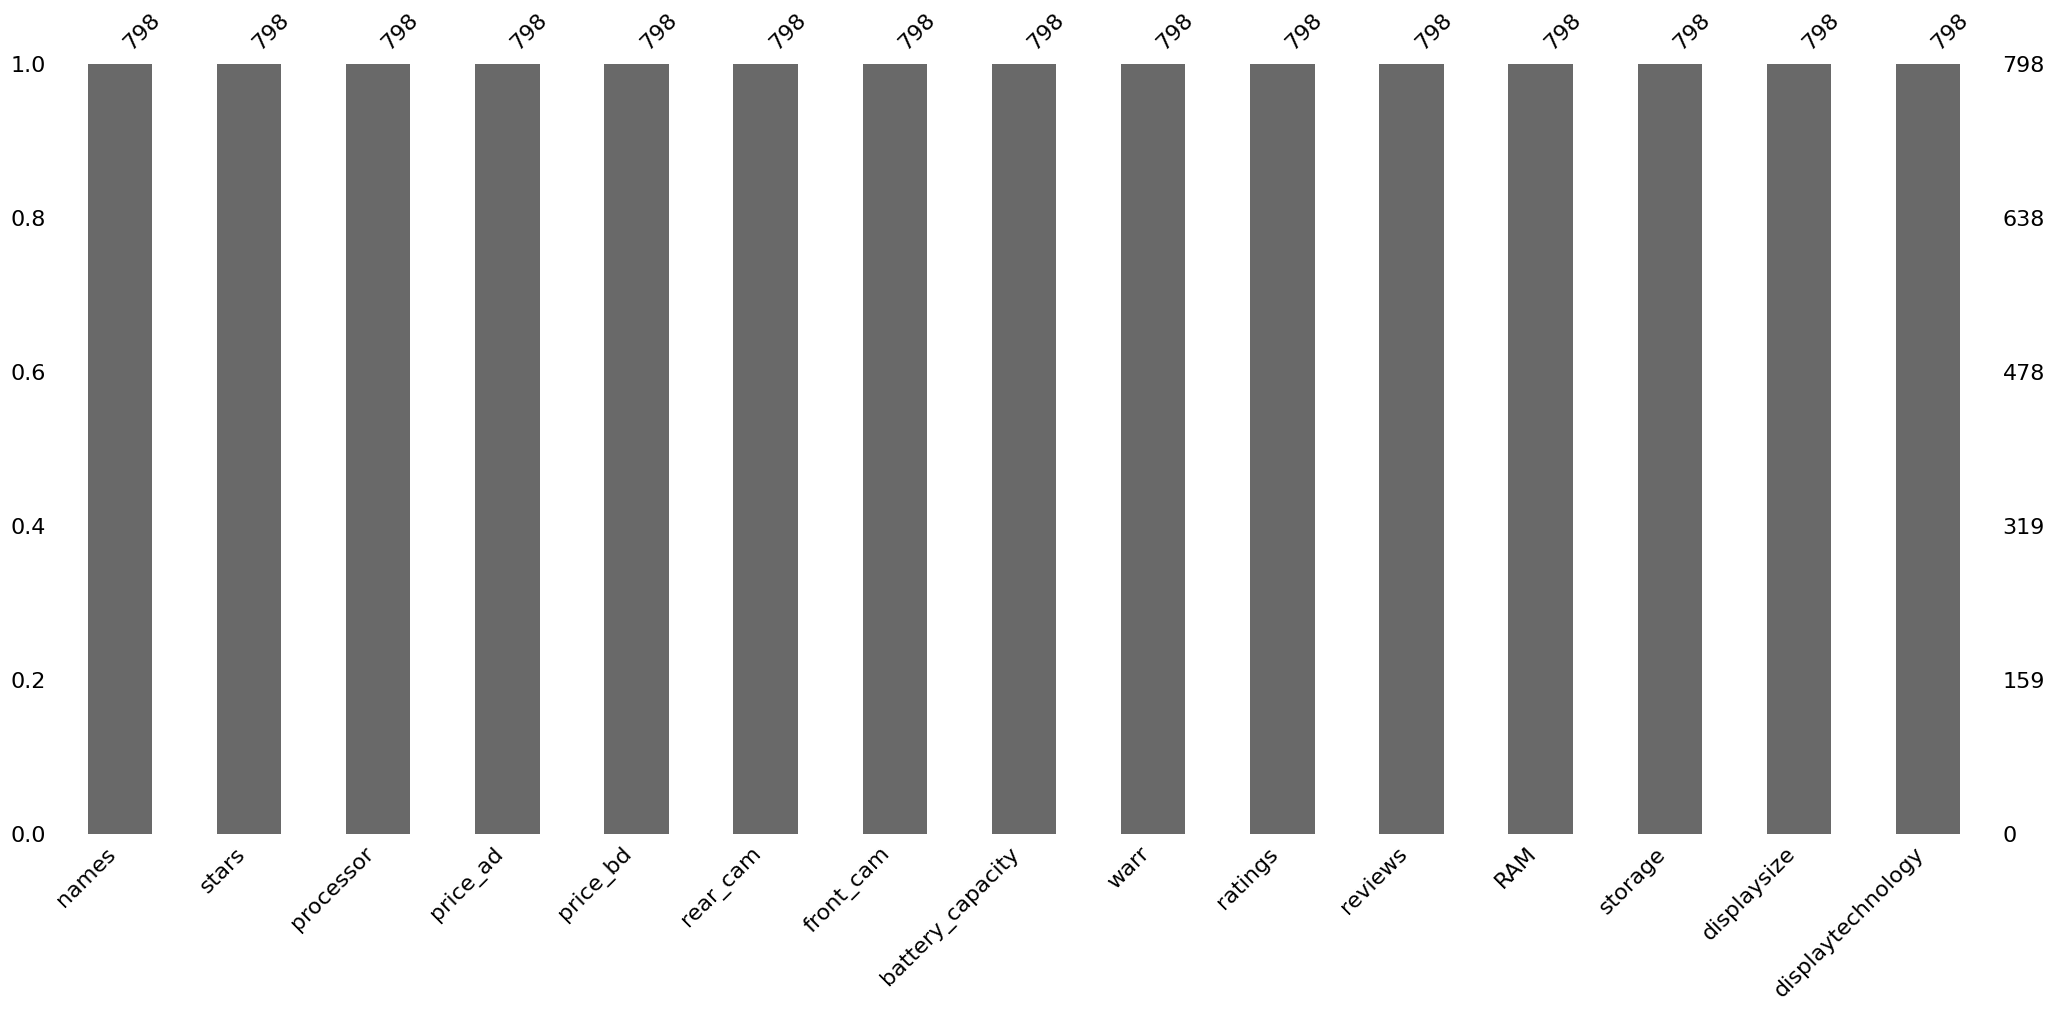

In [714]:
msno.bar(mobiles)

<Axes: >

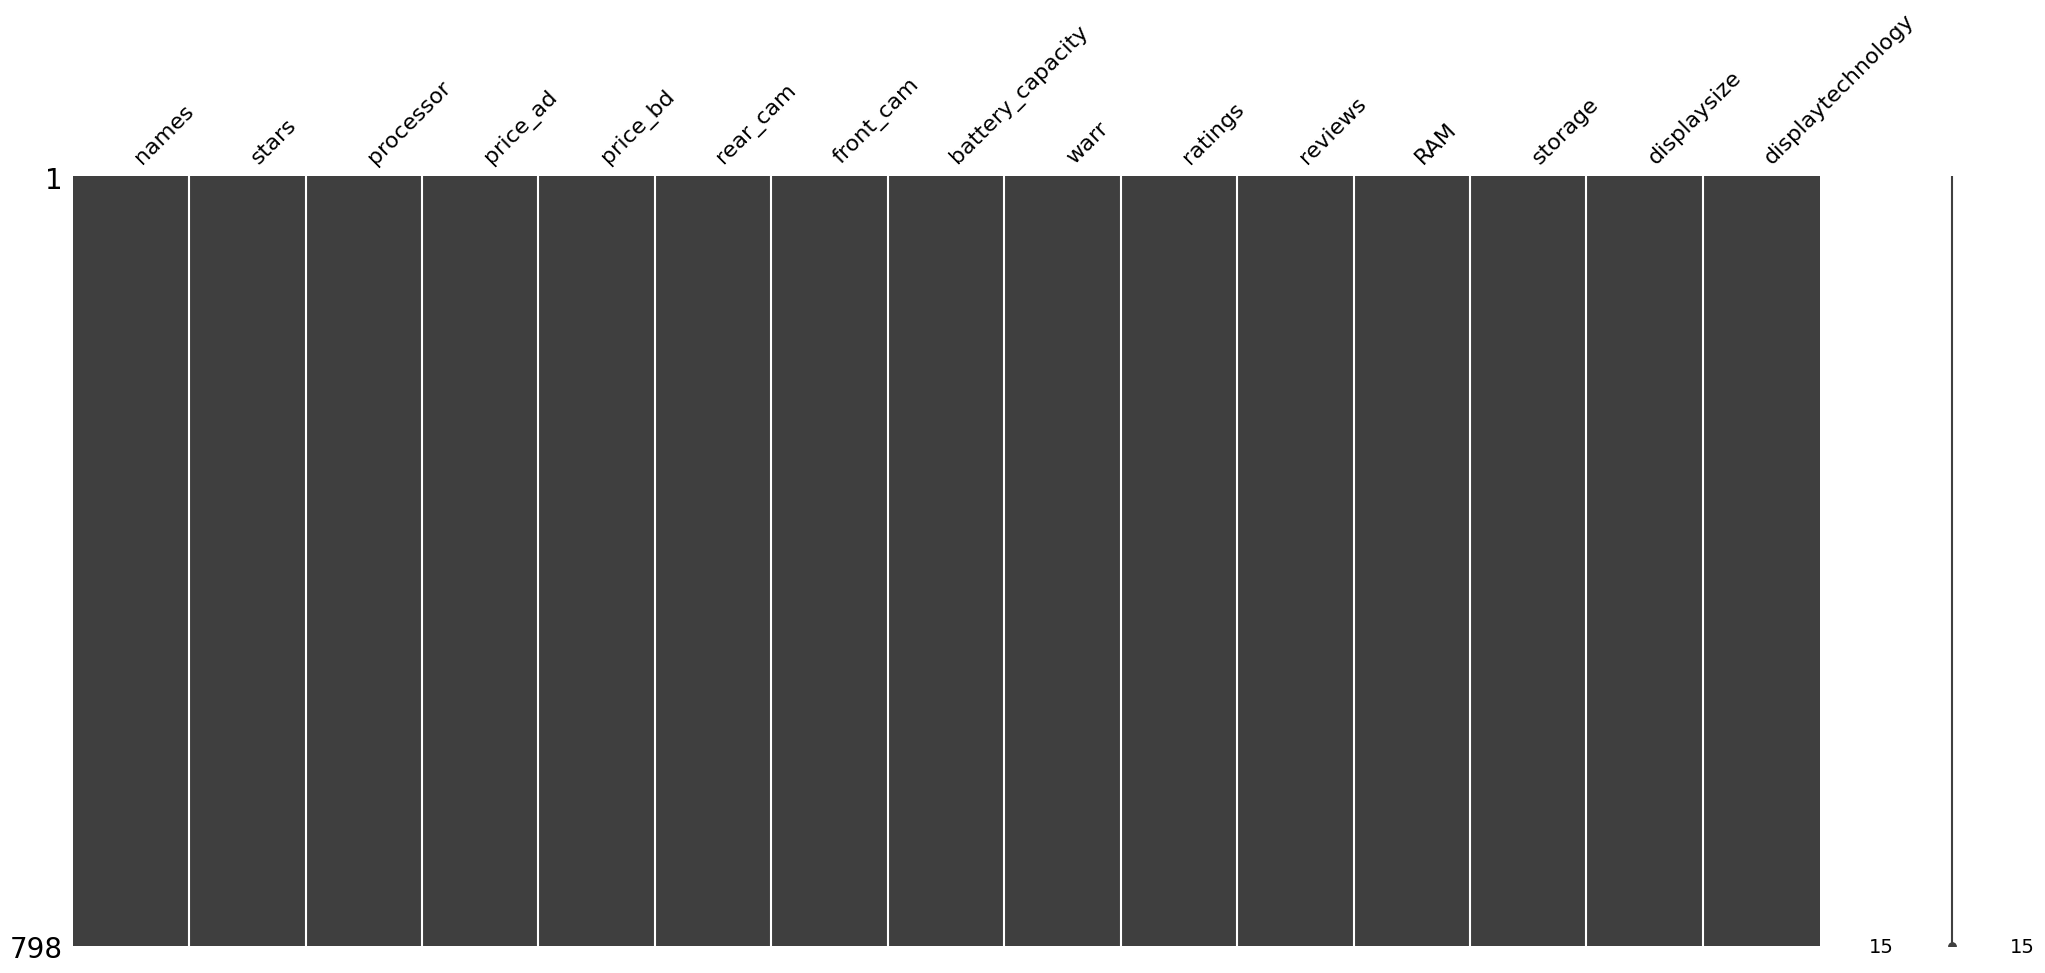

In [715]:
msno.matrix(mobiles)

<Axes: >

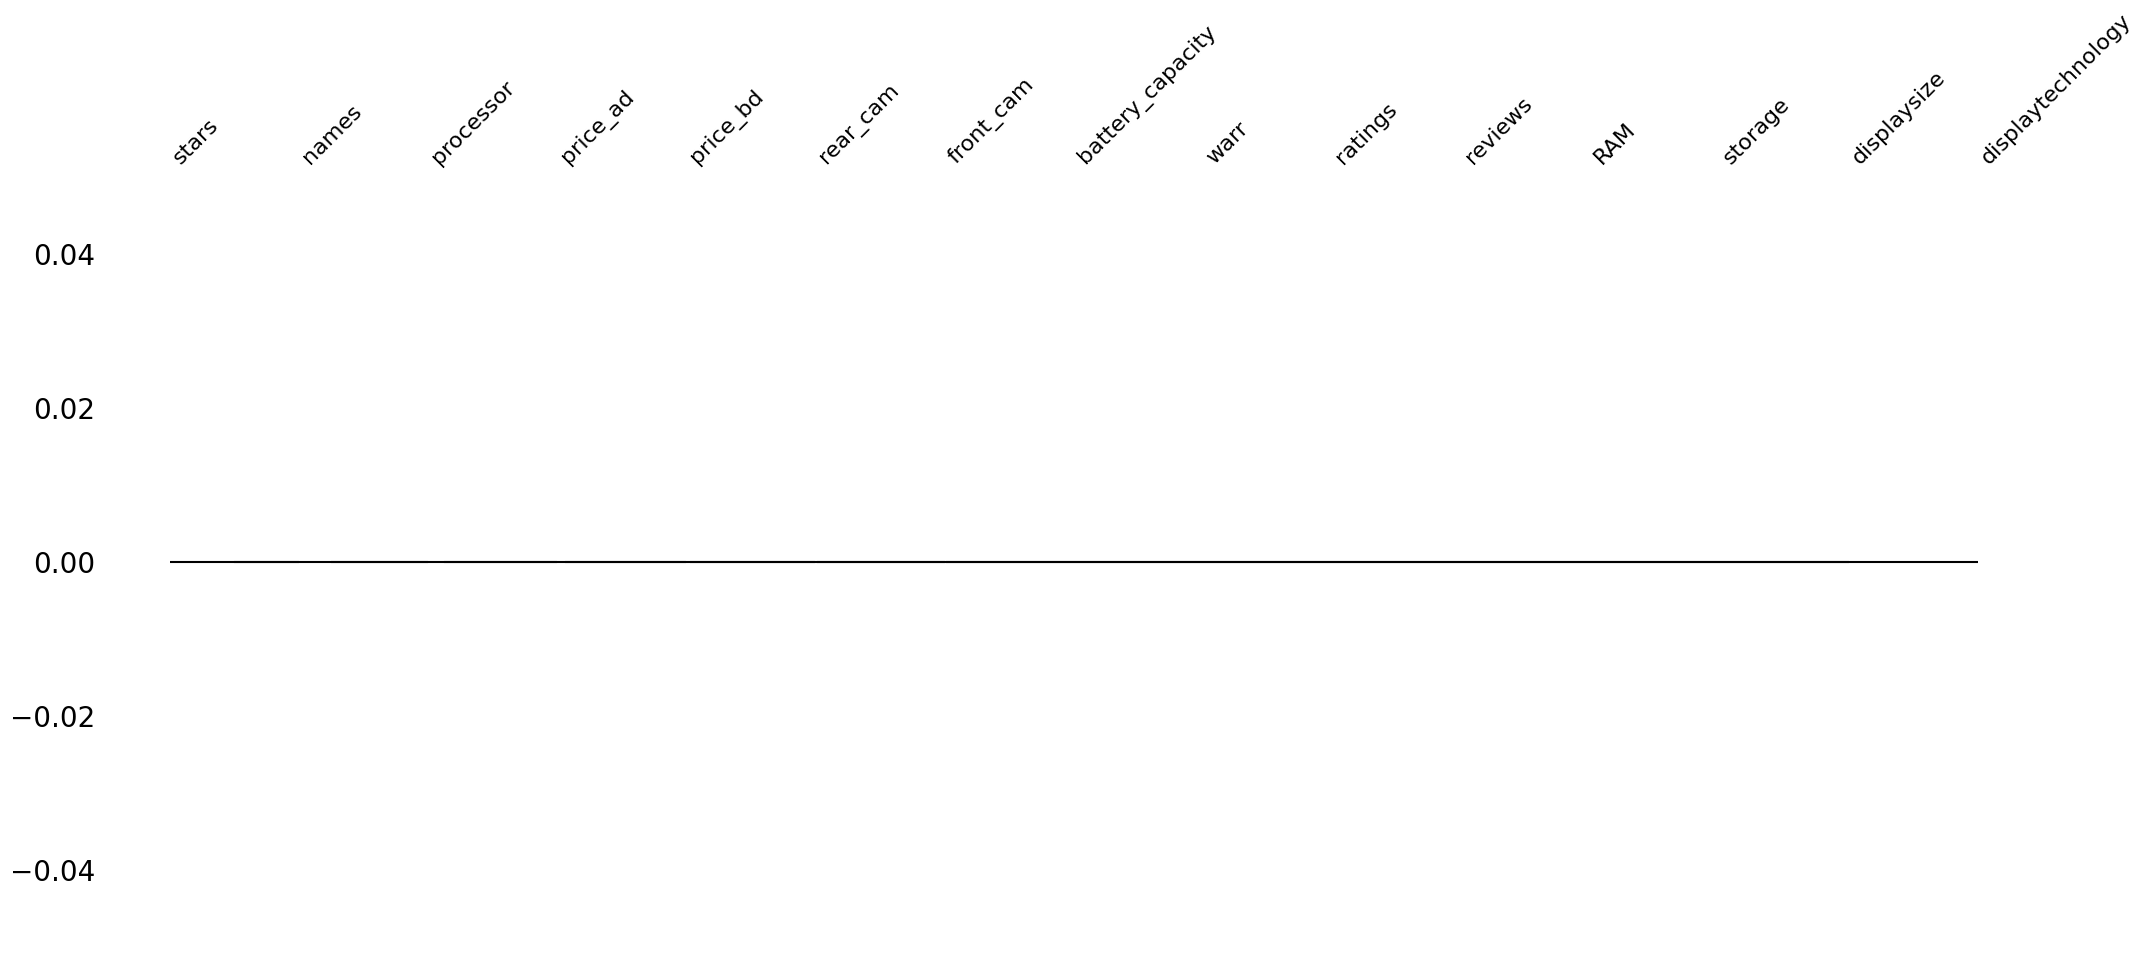

In [743]:
msno.dendrogram(mobiles)

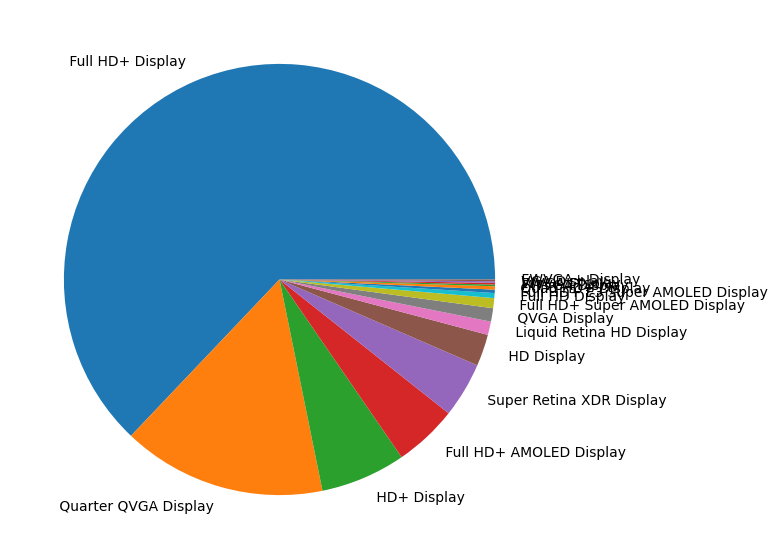

In [778]:
# pie plot of rear_cam
fig = plt.figure(figsize=(10,7))
plt.pie(x=mobiles.displaytechnology.value_counts(), labels=mobiles.displaytechnology.unique())
plt.show()

In [760]:
ax.pie(mobiles.displaytechnology.value_counts(), labels=mobiles.displaytechnology.unique())

NameError: name 'ax' is not defined

In [749]:
mobiles.columns

Index(['names', 'stars', 'processor', 'price_ad', 'price_bd', 'rear_cam',
       'front_cam', 'battery_capacity', 'warr', 'ratings', 'reviews', 'RAM',
       'storage', 'displaysize', 'displaytechnology'],
      dtype='object')

### Analyse des outliers:

array([[<Axes: title={'center': 'stars'}>,
        <Axes: title={'center': 'price_ad'}>,
        <Axes: title={'center': 'price_bd'}>],
       [<Axes: title={'center': 'rear_cam'}>,
        <Axes: title={'center': 'front_cam'}>,
        <Axes: title={'center': 'battery_capacity'}>],
       [<Axes: title={'center': 'warr'}>,
        <Axes: title={'center': 'ratings'}>,
        <Axes: title={'center': 'reviews'}>],
       [<Axes: title={'center': 'RAM'}>,
        <Axes: title={'center': 'storage'}>,
        <Axes: title={'center': 'displaysize'}>]], dtype=object)

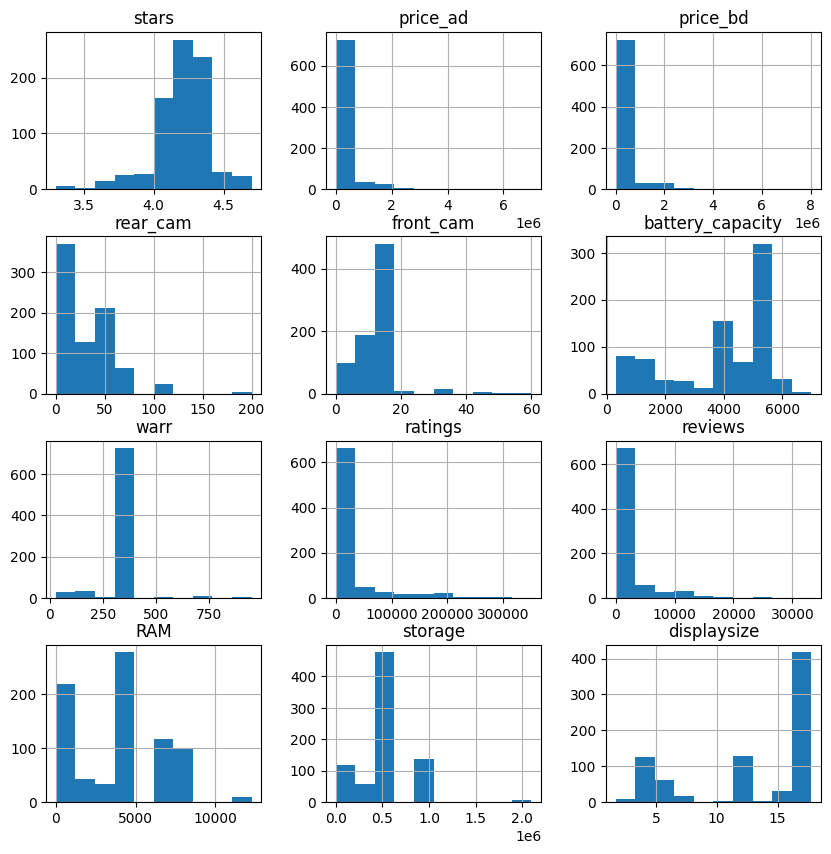

In [717]:
mobiles.hist(figsize=(10, 10))

stars                  Axes(0.125,0.712609;0.168478x0.167391)
price_ad            Axes(0.327174,0.712609;0.168478x0.167391)
price_bd            Axes(0.529348,0.712609;0.168478x0.167391)
rear_cam            Axes(0.731522,0.712609;0.168478x0.167391)
front_cam              Axes(0.125,0.511739;0.168478x0.167391)
battery_capacity    Axes(0.327174,0.511739;0.168478x0.167391)
warr                Axes(0.529348,0.511739;0.168478x0.167391)
ratings             Axes(0.731522,0.511739;0.168478x0.167391)
reviews                 Axes(0.125,0.31087;0.168478x0.167391)
RAM                  Axes(0.327174,0.31087;0.168478x0.167391)
storage              Axes(0.529348,0.31087;0.168478x0.167391)
displaysize          Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

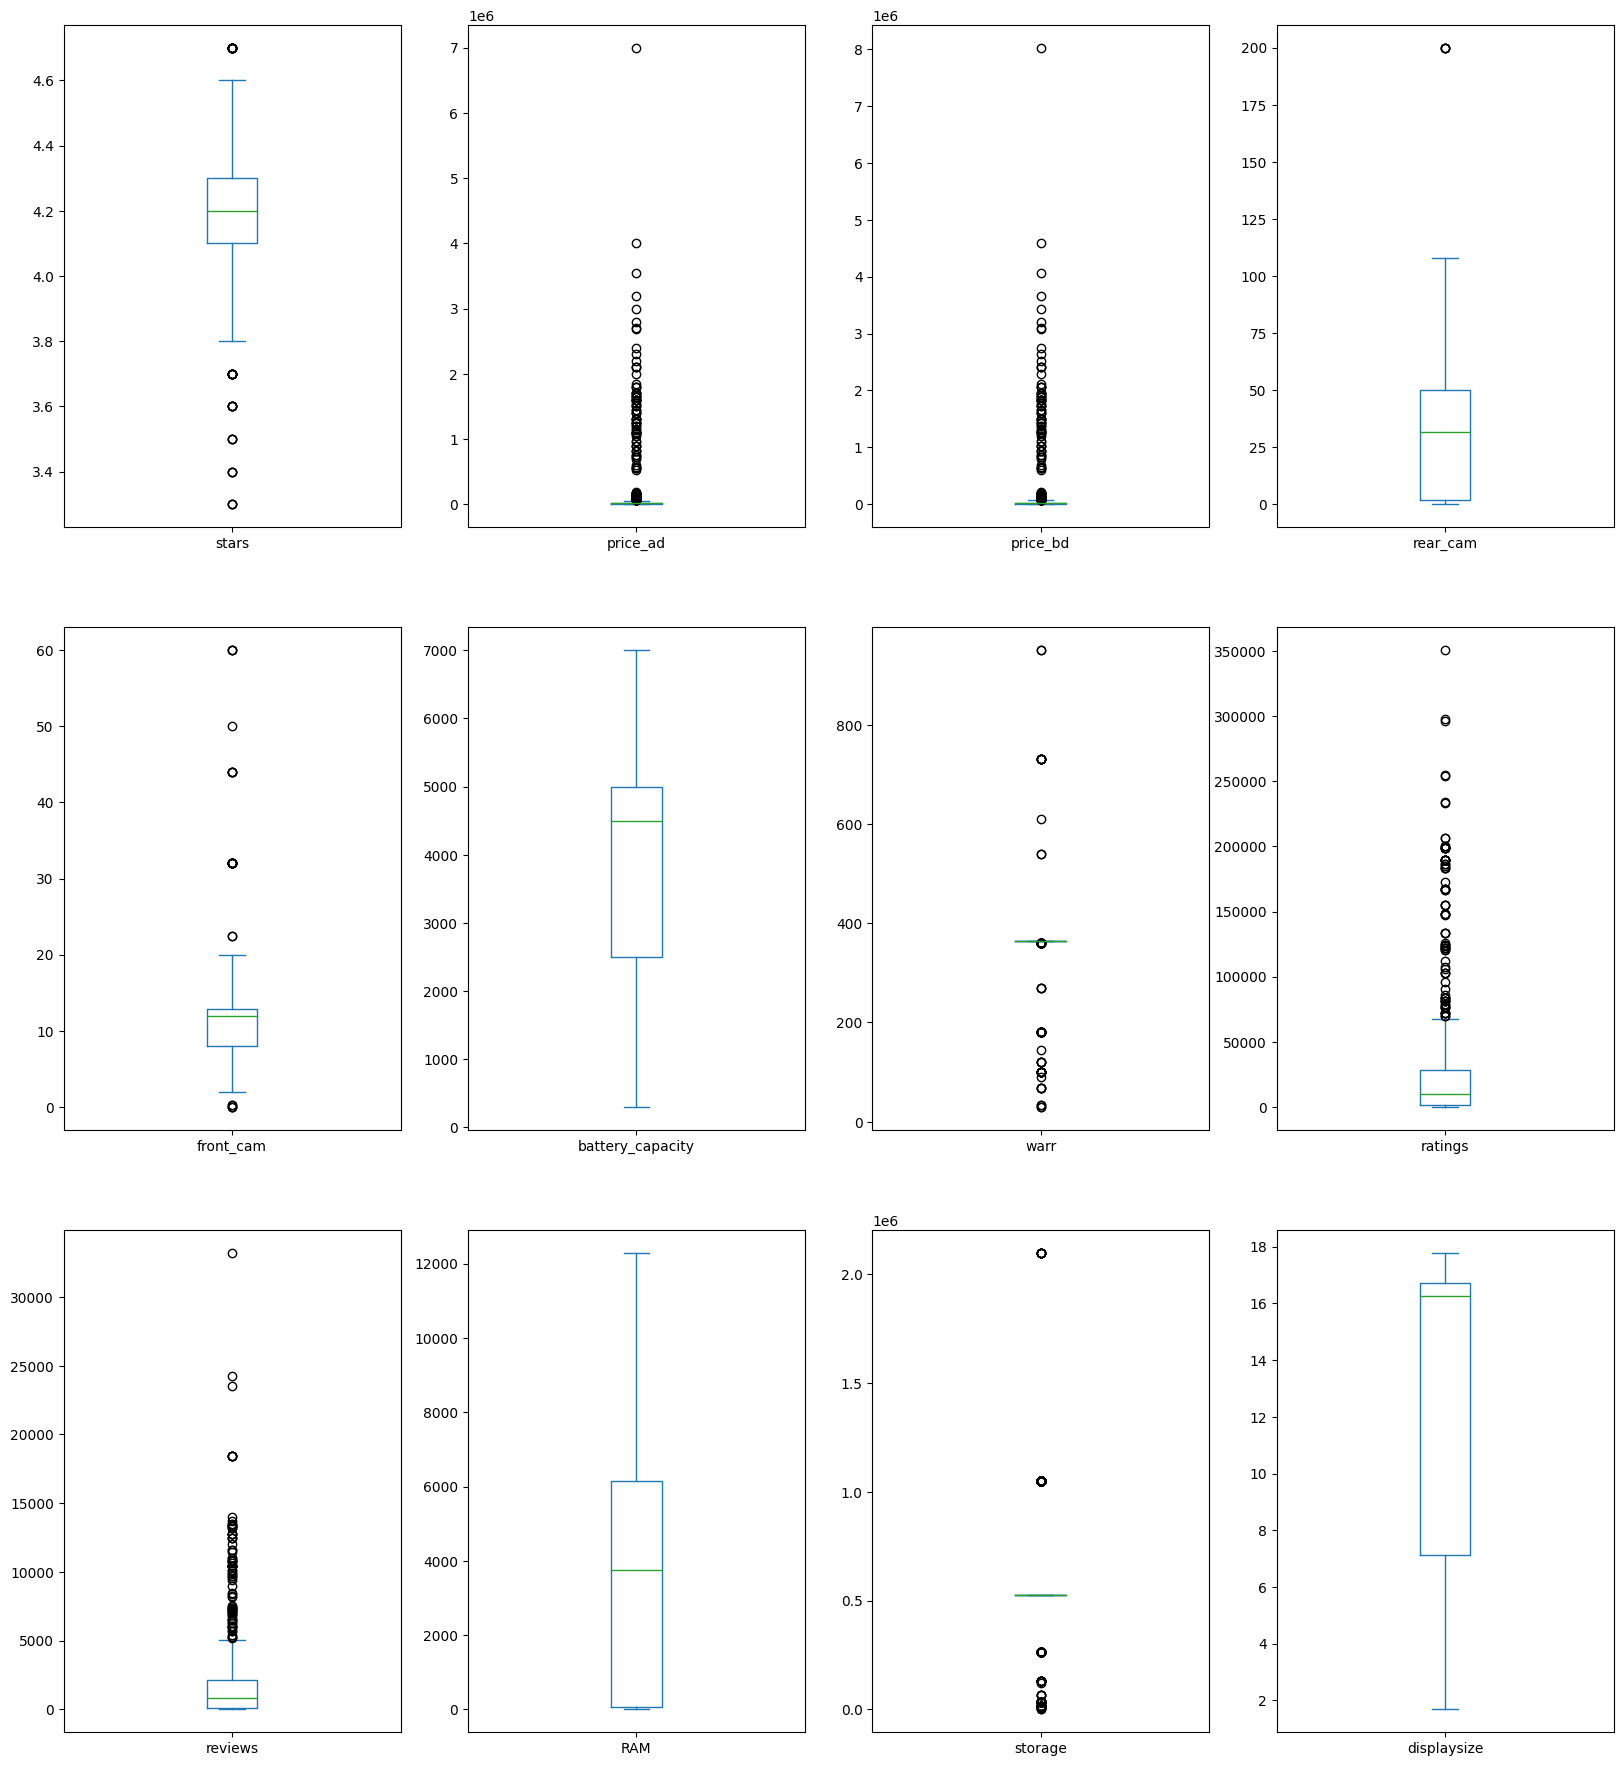

In [787]:
mobiles.dropna().plot(kind='box', subplots=True, layout=(4,4), figsize=(20,30))

In [719]:
q1,q3=np.percentile(mobiles.reviews.dropna(),[25,75])
IQR=q3-q1
lowerIQR=q1-1.5*IQR
upperIQR=q3+1.5*IQR
q1,q3,IQR,lowerIQR,upperIQR

(85.25,
 2115.4003067484664,
 2030.1503067484664,
 -2959.9754601226996,
 5160.625766871166)

In [720]:
mobiles.reviews[(mobiles.reviews>upperIQR ) & (mobiles.reviews<lowerIQR)]

Series([], Name: reviews, dtype: float64)

In [721]:
mobiles.columns

Index(['names', 'stars', 'processor', 'price_ad', 'price_bd', 'rear_cam',
       'front_cam', 'battery_capacity', 'warr', 'ratings', 'reviews', 'RAM',
       'storage', 'displaysize', 'displaytechnology'],
      dtype='object')

<p> Explorer les processeurs et eliminer les intrus

In [724]:
mobiles.isnull().sum()

names                0
stars                0
processor            0
price_ad             0
price_bd             0
rear_cam             0
front_cam            0
battery_capacity     0
warr                 0
ratings              0
reviews              0
RAM                  0
storage              0
displaysize          0
displaytechnology    0
dtype: int64

<p> en explorant la colonne rear_cam, on voit que certaines valeurs de la colonne battery_capacity sont enregistrés dans la colonne rear_cam alors on les ait corrigé

In [725]:
mobiles.warr.value_counts(dropna=False)

365.0    681
360.0     44
180.0     30
100.0     14
730.0      7
120.0      4
270.0      3
68.0       3
33.0       2
540.0      2
950.0      2
30.0       2
67.0       1
144.0      1
90.0       1
610.0      1
Name: warr, dtype: int64

<Axes: xlabel='stars', ylabel='Density'>

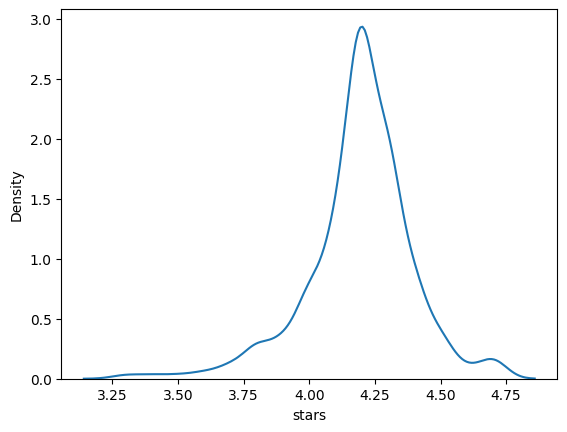

In [766]:
sns.kdeplot(mobiles.stars)